# Mortality in Australia  

### Vanessa Nguyen, 
### GITHUB: vanessvtnguyen

# Mortality in Australia 

Mortality data plays a vital role in anaylsing demographic transition and provides a snapshot on the current standard of health in each community. The years that are potentially lost and the cause assist health authorities in improving the overall wellbeing of the population. 

This dataset focuses on how the mortality rates in Australia have changed in the past millenium and the present day. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.patches as mpatches



In [2]:
saved_style_state = matplotlib.rcParams.copy() 

In [3]:
def retrievingdata(filepath):
    if os.path.isfile(filepath):
        print("loading")
        print("done")
    else:
        print("Insert file")
    return(pd.read_csv(filepath,low_memory=False))

## How has the Number of Deaths Changed across Time? 

In [4]:
number_of_deaths = retrievingdata("Number_of_Deaths.csv")

loading
done


In [5]:
number_of_deaths['Males'] = number_of_deaths['Males'].astype(str).str.replace(',','').astype(int)
number_of_deaths['Females'] = number_of_deaths['Females'].astype(str).str.replace(',','').astype(int)
number_of_deaths['Total'] = number_of_deaths['Total'].astype(str).str.replace(',','').astype(int)
number_of_deaths[['Males','Females','Total']] = number_of_deaths[['Males','Females','Total']].div(1000)
number_of_deaths

Year   Males  Females    Total
0    1907  25.939   19.366   45.305
1    1908  26.632   19.794   46.426
2    1909  25.514   18.658   44.172
3    1910  26.154   19.436   45.590
4    1911  27.591   20.278   47.869
..    ...     ...      ...      ...
106  2013  75.782   71.896  147.678
107  2014  78.341   75.239  153.580
108  2015  81.330   77.722  159.052
109  2016  81.867   76.637  158.504
110  2017  82.858   78.051  160.909

[111 rows x 4 columns]

In [6]:
def death_trend():
    plt.figure(figsize=(20, 10))
    sns.set_style("whitegrid")
    plt.plot(number_of_deaths['Year'], number_of_deaths['Males'], label="Males", color='#6873E3')
    plt.plot(number_of_deaths['Year'], number_of_deaths['Females'], label="Females", color='#E368C5')
    plt.plot(number_of_deaths['Year'], number_of_deaths['Total'], label="Total", color='#5AEF56')
    plt.legend(prop={"size":15})
    plt.title("Number of Deaths 1907 to 2017", fontsize=28, fontweight='bold')
    plt.xlabel("Years")
    plt.ylabel("Number of Deaths per 1000 of Population")
    plt.show()

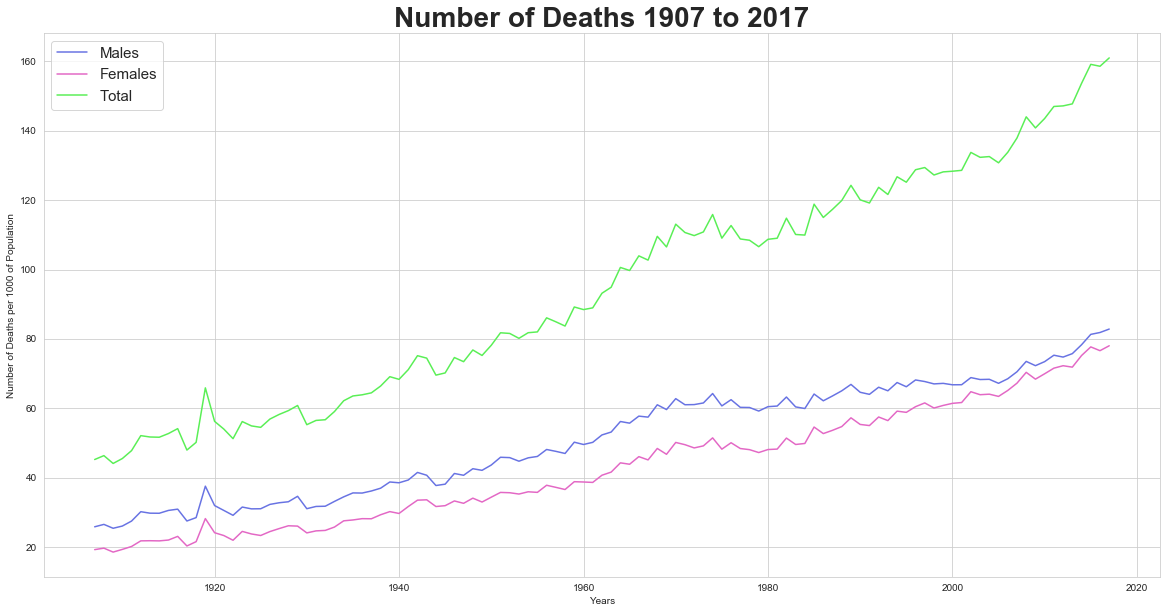

In [7]:
death_trend()

## What about the Potential Years of Life Lost over Time?

**Potential Years of Life Lost** (PYLL) is the measure of premature mortality. It is the average estimate of how many years an individual would have lived if they did not die prematurely. 

In [8]:
pyll = retrievingdata("PYLL.csv")

loading
done


In [9]:
pyll
pyll['Males'] = pyll['Males'].astype(str).str.replace(',','').astype(int)
pyll['Females'] = pyll['Females'].astype(str).str.replace(',','').astype(int)
pyll['Total'] = pyll['Total'].astype(str).str.replace(',','').astype(int)
pyll[['Males','Females','Total']] = pyll[['Males','Females','Total']].div(1000)

In [10]:
def pyll_graph():
    y = [pyll['Total'],pyll['Females'], pyll['Males']]
    plt.figure(figsize=(20, 10))
    pal = ["#E368C5","#5B69FF", "#5AEF56"]
    plt.stackplot(pyll['Years'], y, labels=['Females','Males','Total'], colors=pal, alpha=0.4 )
    plt.legend(loc='upper right', prop={"size":15})
    plt.title("Potential Years of Life Lost 1907 to 2017", fontsize=28, fontweight='bold')
    plt.xlabel("Years")
    plt.ylabel("Potential Years of Life Lost per 1000 of Population")

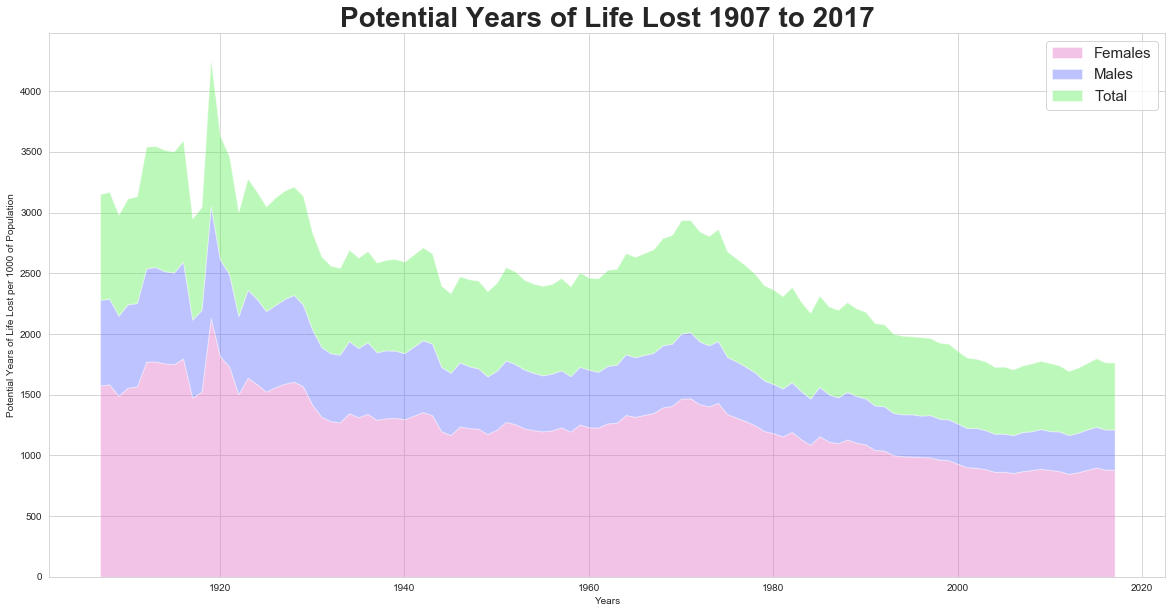

In [11]:
pyll_graph()

## So, how has PYLL and number of deaths changed against each other?

In [12]:
newpyll  = pyll.drop(['Years'], axis=1).add_suffix('.pyll')
df2 = pd.concat([number_of_deaths, newpyll], axis=1)

In [13]:
def scatterplot_pyll():
    plt.figure(figsize=(20, 10))
    sns.regplot(x=number_of_deaths["Total"], y=newpyll["Total.pyll"])
    plt.title("Potential Years of Life Lost against Number of Deaths", fontsize=28, fontweight='bold')
    plt.xlabel("Number of Deaths", fontsize=15)
    plt.ylabel("Potential Years of Life Lost", fontsize=15)
    plt.show()

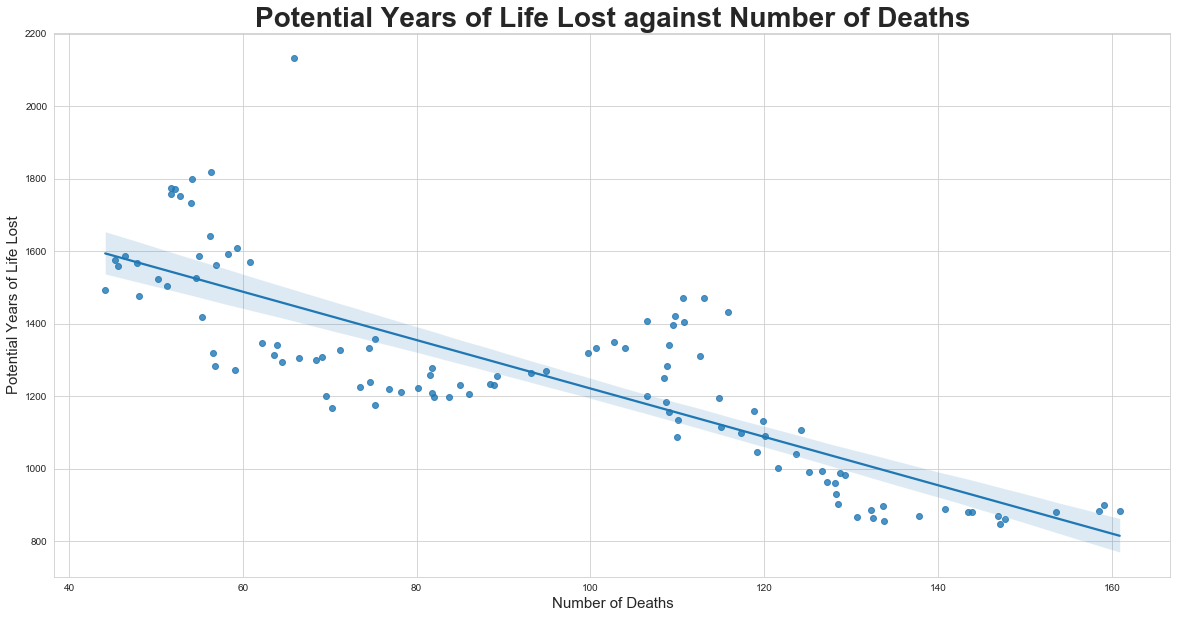

In [14]:
scatterplot_pyll()

## Why is it that the PYLL and Number of Deaths have an inverse relationship? 

In [15]:
child_death = retrievingdata("Child_Deaths.csv")

loading
done


In [16]:
#Remove ','
child_death['Males'] = child_death['Males'].astype(str).str.replace(',','').astype(int)
child_death['Females'] = child_death['Females'].astype(str).str.replace(',','').astype(int)
child_death['Total'] = child_death['Total'].astype(str).str.replace(',','').astype(int)
child_death = child_death.drop(['Years'], axis=1).add_suffix('.cd')

In [17]:
df3 = pd.concat([df2, child_death], axis=1)
df3

Year   Males  Females    Total  Males.pyll  Females.pyll  Total.pyll  \
0    1907  25.939   19.366   45.305     870.650       705.733    1576.383   
1    1908  26.632   19.794   46.426     880.793       705.258    1586.050   
2    1909  25.514   18.658   44.172     831.830       660.180    1492.010   
3    1910  26.154   19.436   45.590     871.410       687.100    1558.510   
4    1911  27.591   20.278   47.869     880.475       687.373    1567.848   
..    ...     ...      ...      ...         ...           ...         ...   
106  2013  75.782   71.896  147.678     535.403       325.618     861.021   
107  2014  78.341   75.239  153.580     547.228       333.209     880.437   
108  2015  81.330   77.722  159.052     565.266       335.009     900.275   
109  2016  81.867   76.637  158.504     552.523       330.634     883.157   
110  2017  82.858   78.051  160.909     552.351       330.401     882.752   

     Males.cd  Females.cd  Total.cd  
0        6482        5341     11823  
1        6339        5029     11368  
2        5927        4786     10713  
3        6404        5119     11523  
4        6126        4871     10997  
..        ...         ...       ...  
106       709         601      1310  
107       636         555      1191  
108       662         539      1201  
109       654         507      1161  
110       665         544      1209  

[111 rows x 10 columns]

In [18]:
def bubblechart_pyll():
    plt.figure(figsize=(40, 25))
    plt.scatter(df3["Total"], df3["Total.pyll"], s=df3["Total.cd"], c=df3["Total"], cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
    plt.title("Relationship of Potential Years of Life Lost, Number of Deaths and Child Deaths", fontsize=40, fontweight='bold')
    plt.xlabel("Number of Deaths", fontsize=20)
    plt.ylabel("Potential Years of Life Lost", fontsize=20)
    plt.show()

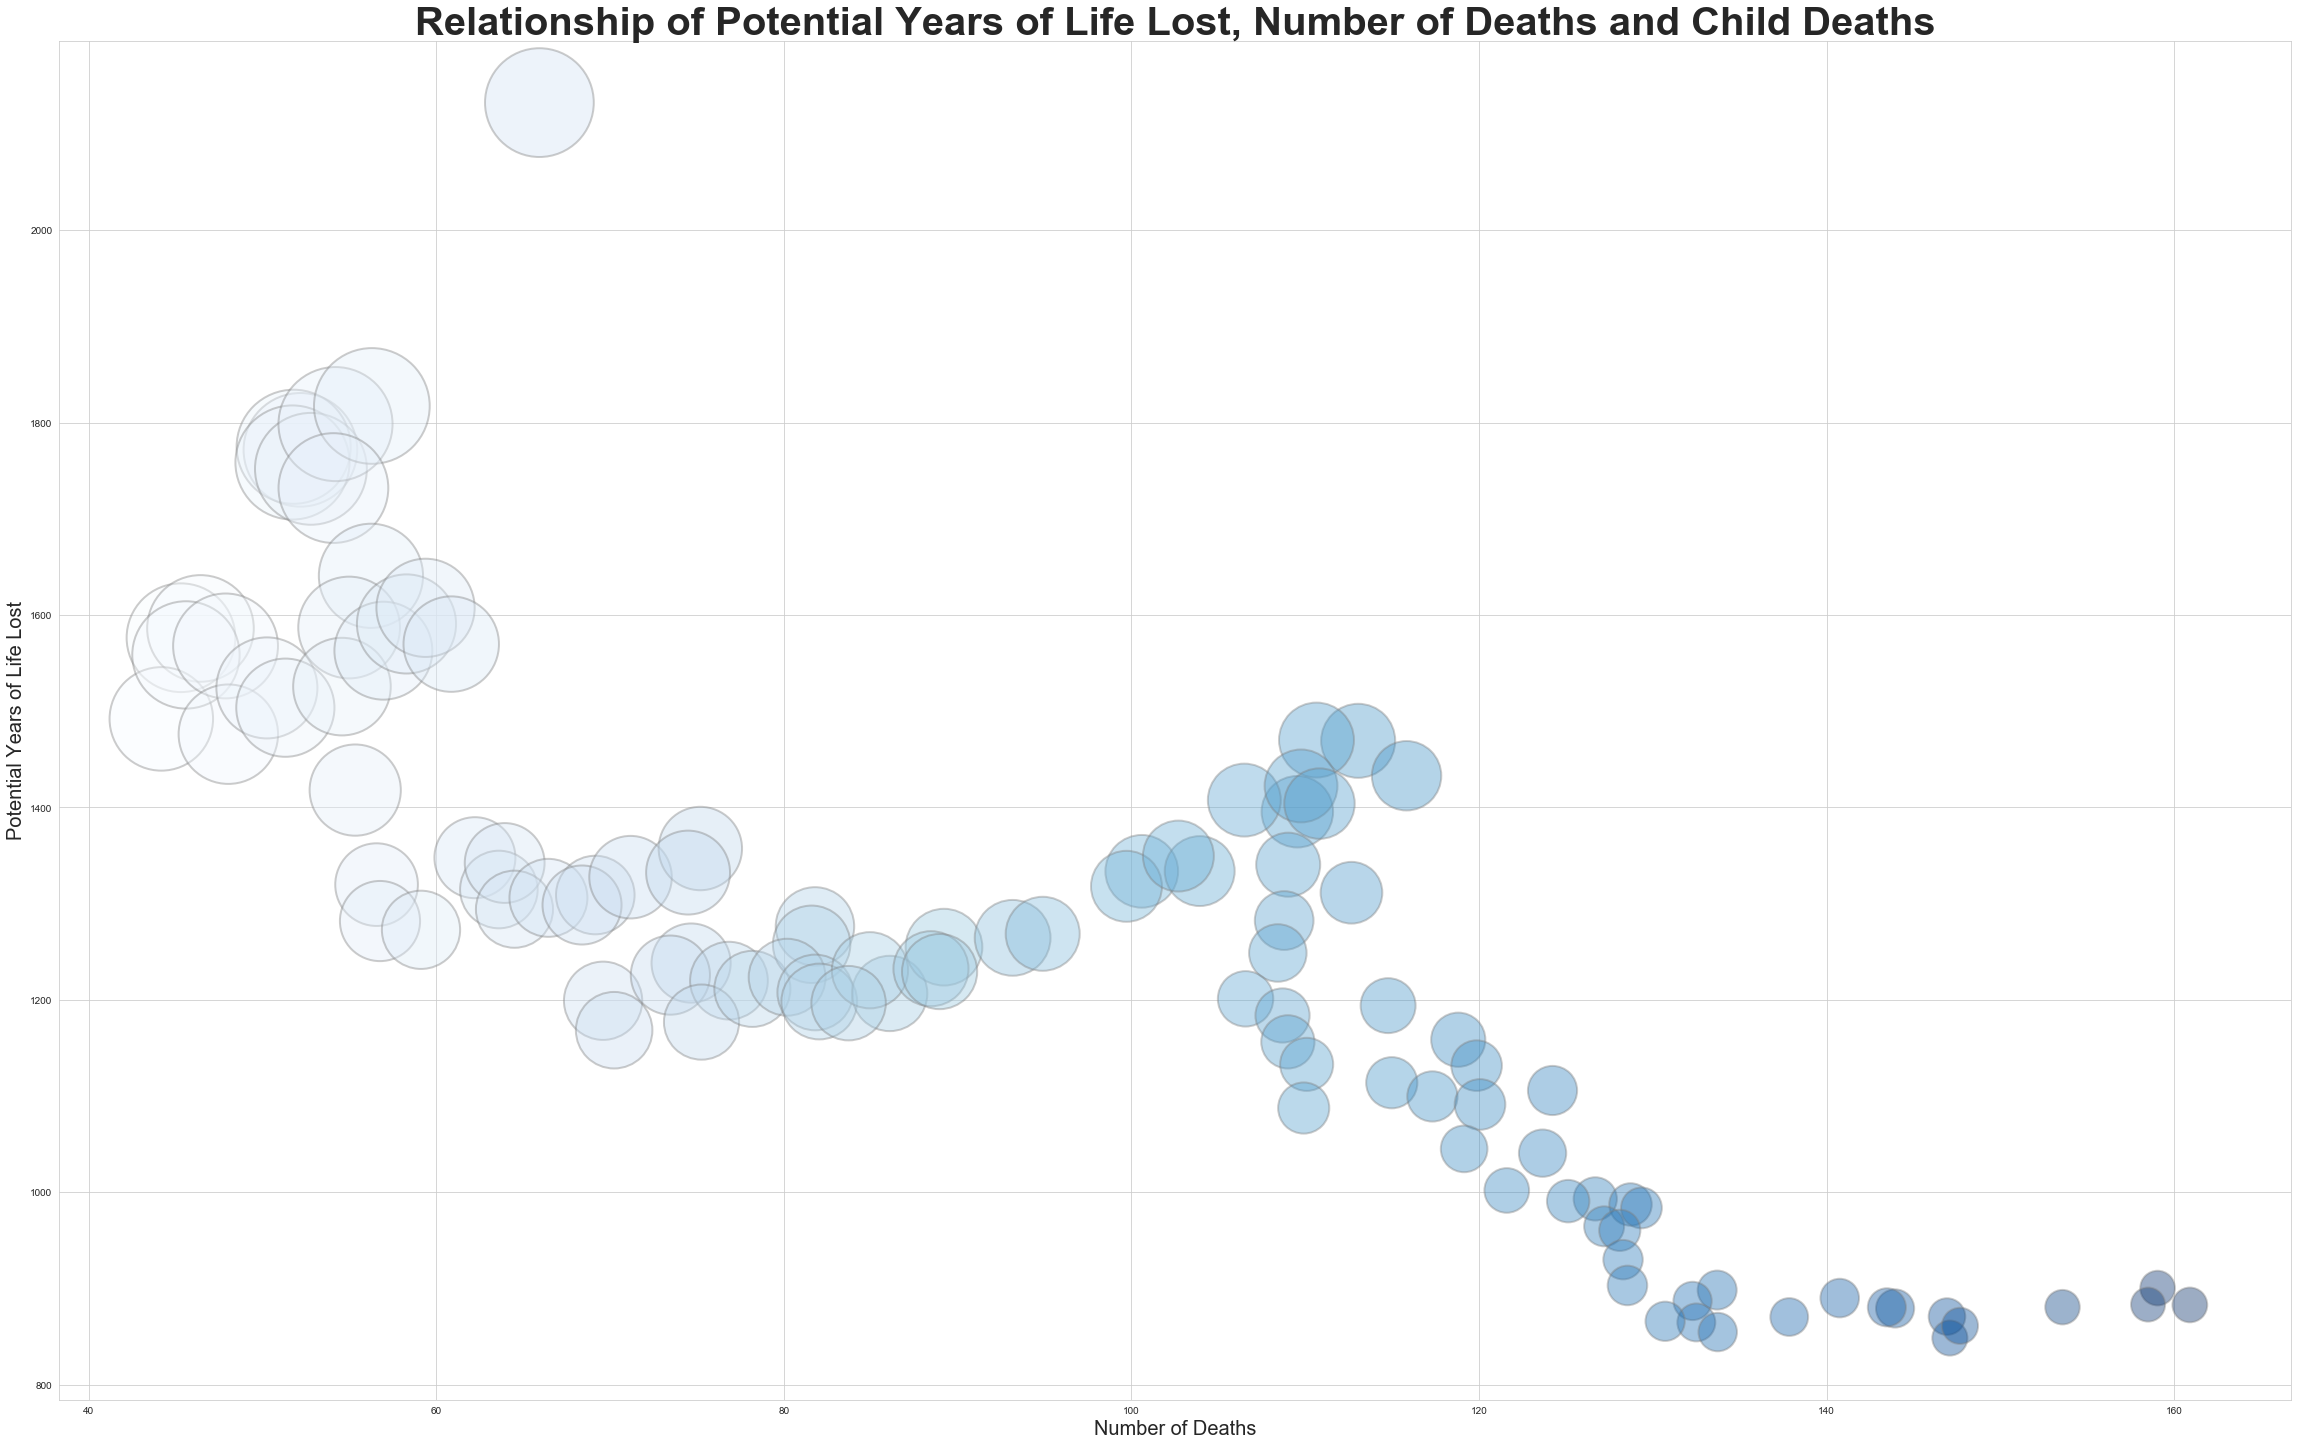

In [19]:
bubblechart_pyll()

## Changes in Life Expectancy

In [20]:
life_expectancy = retrievingdata("LIfe_Expectancy.csv")

loading
done


In [21]:
def lifeexpectancy():
    plt.figure(figsize=(20, 10))
    sns.set_style("whitegrid")
    plt.plot(life_expectancy['Year'], life_expectancy['Males'], label="Males", color='#6873E3')
    plt.plot(life_expectancy['Year'], life_expectancy['Females'], label="Females", color='#E368C5')
    plt.legend(prop={"size":15})
    plt.xticks(rotation=45, ha="right")
    plt.title("Life Expectancy from 1880 to 2017", fontsize=28, fontweight='bold')
    plt.xlabel("Years")
    plt.ylabel("Potential Years of Life Loss per 1000 of Population")
    plt.show()

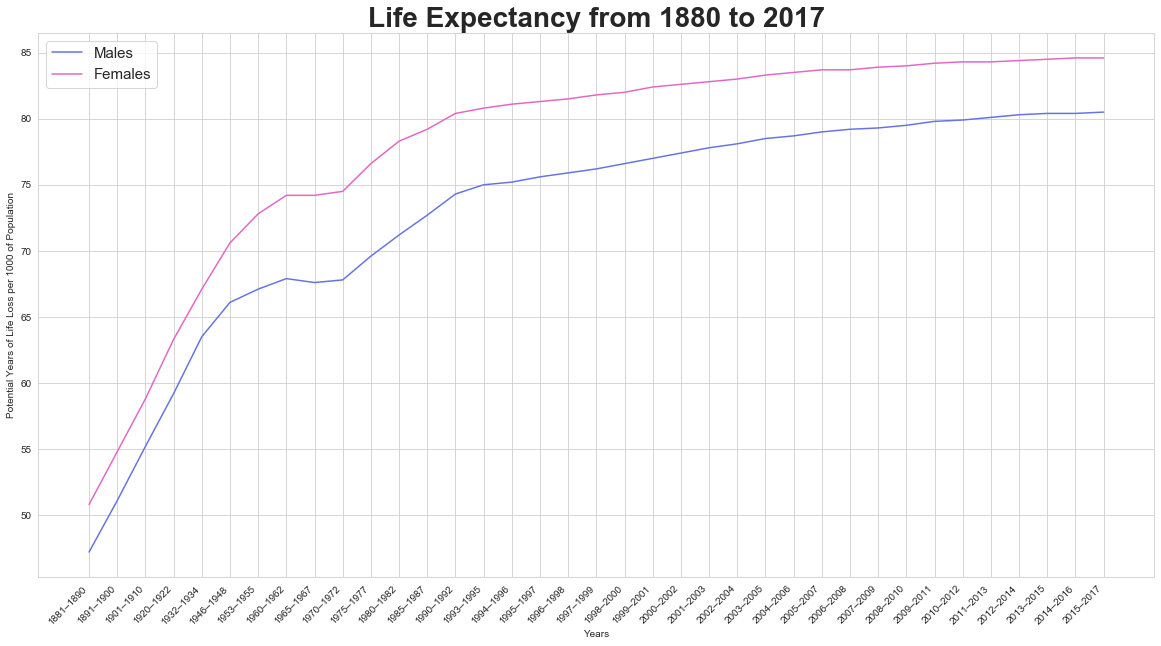

In [22]:
lifeexpectancy()

## Mortality Rates in Recent Years

In [23]:
age_group = retrievingdata("Deaths_sex_age_group.csv")

loading
done


In [24]:
refinedage_group = age_group[['Age','Males','Females']].iloc[0:21]
refinedage_group

Age    Males  Females
0     0–4    665.0    544.0
1     5–9     66.0     57.0
2   10–14     87.0     53.0
3   15–19    291.0    152.0
4   20–24    506.0    173.0
5   25–29    601.0    241.0
6   30–34    748.0    341.0
7   35–39    919.0    476.0
8   40–44   1246.0    712.0
9   45–49   1856.0   1124.0
10  50–54   2398.0   1610.0
11  55–59   3603.0   2262.0
12  60–64   4834.0   2972.0
13  65–69   6768.0   4239.0
14  70–74   8793.0   5742.0
15  75–79  10440.0   7577.0
16  80–84  12340.0  10689.0
17  85–89  13879.0  15305.0
18  90–94   9514.0  15169.0
19  95–99   2920.0   7034.0
20    100    381.0   1577.0

In [25]:
age_group.iloc[21:23]

Age    Males  Females Persons
21             All ages  82858.0  78051.0  160909
22  Median age at death     78.0     85.0    81.0

In [26]:
def death_agegroup():
    #Define x and y limits
    y = range(0, len(refinedage_group))
    x_male = refinedage_group['Males']
    x_female = refinedage_group['Females']

    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(20, 10))
    fig.patch.set_facecolor('xkcd:white')
    sns.set_style("whitegrid")
    plt.figtext(.5,.9,"Number of Deaths by Age Group 2017", fontsize=20, ha='center', fontweight='bold')
     
    axes[0].barh(y, x_male, align='center', color='lightblue')
    axes[0].set(title='Males')
    axes[1].barh(y, x_female, align='center', color='lightpink')
    axes[1].set(title='Females')

    # Adjust grid parameters and specify labels for y-axis
    axes[1].grid()
    axes[0].set(yticks=y, yticklabels=refinedage_group['Age'])
    axes[0].invert_xaxis()
    axes[0].grid()
    plt.show()

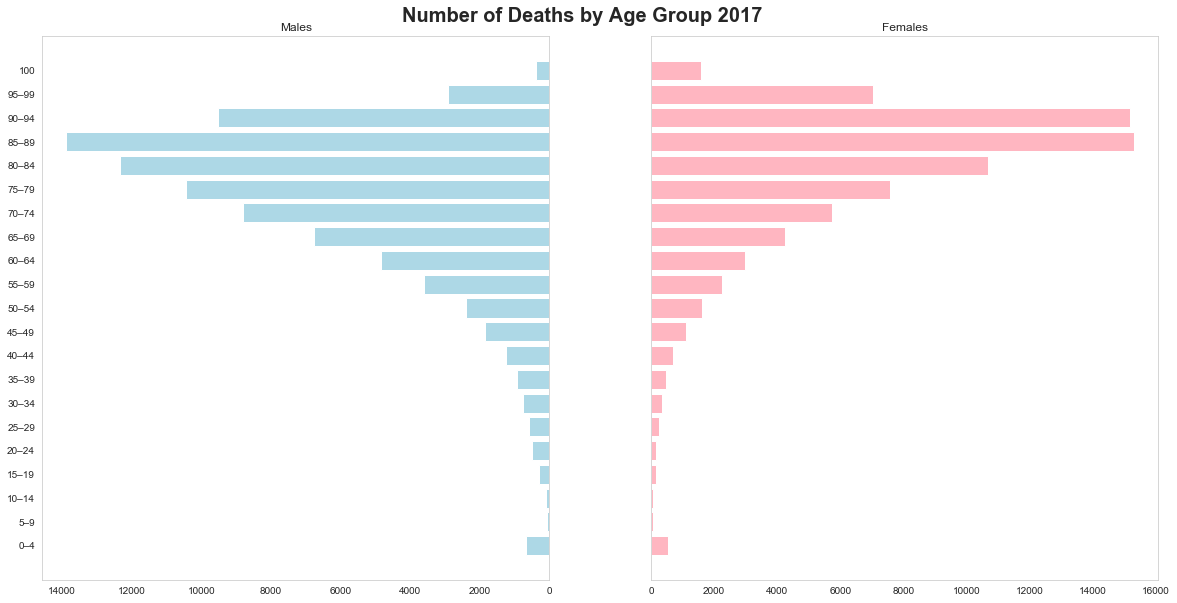

In [27]:
death_agegroup()

# What are the Leading Causes of Death in Present Day Australia?

In [28]:
causes = retrievingdata('Leading_Causes_by_Age.csv')

loading
done


In [29]:
causes['Number of Deaths'] = causes['Number of Deaths'].astype(str).astype(int)

In [30]:
# organising groups for graphs
all_ages = causes.loc[causes['Age'] == 'All ages']
all_ages_colour = ['#E53935','#F4511E','#FB8C00','#FFB300','#FDD835','#C0CA33','#7CB342','#43A047','#00897B','#A2D9CE','#17A589','#00ACC1','#039BE5','#1E88E5','#3949AB','#7D3C98','#5E35B1','#884EA0','#E91E63','#EC407A']
Under_1 = causes.loc[causes['Age'] == 'Under 1']
Group1 = causes.loc[21:40]
Group1_colour = ['#D7BDE2','#F1948A','#FAD7A0','#F5CBA7','#80DEEA','#E91E63','#FFF59D','#17A589','#A9DFBF','#A2D9CE','#43A047','#A3E4D7','#AED6F1','#5DADE2','#F48FB1','#EFEBE9','#F5F5F5','#ECEFF1','#A2D9CE','#FCE4EC']
Group2 = causes.loc[41:61]
Group2_colour = ['#17A589','#D7BDE2','#BBDEFB','#F5CBA7','#E91E63','#F9E79F','#FAD7A0','#ABEBC6','#80DEEA','#A2D9CE','#A3E4D7','#E0E0E0','#3949AB','#BCAAA4','#A9CCE3','#AED6F1','#FAE5D3','#FCE4EC','#D6DBDF','#F48FB1','#7CB342']
Group3 = causes.loc[62:81]
Group3_colour = ['#17A589','#BBDEFB','#D7BDE2','#E53935','#F9E79F','#FFF59D','#E91E63','#E3F2FD','#A9CCE3','#A9DFBF','#FB8C00','#FFB300','#7CB342','#FFCCBC','#FCE4EC','#F3E5F5','#EDE7F6','#E8EAF6','#E3F2FD','#EDBB99']
Group4 = causes.loc[82:101]
Group4_colour = ['#E53935','#FFB300','#C0CA33','#17A589','#00ACC1','#E3F2FD','#FB8C00','#FDD835','#039BE5','#7CB342','#EC407A','#BBDEFB','#FAD7A0','#1E88E5','#E91E63','#EF5350','#D7BDE2','#FFCCBC','#64B5F6','#FFEBEE']
Group5 = causes.loc[102:121]
Group5_colour = ['#FFB300','#E53935','#FDD835','#C0CA33','#FB8C00','#7CB342','#039BE5','#00ACC1','#A2D9CE','#A2D9CE','#1E88E5','#EC407A','#A9CCE3','#80DEEA','#EF5350','#EDE7F6','#FAD7A0','#FFCCBC','#64B5F6','#F48FB1']
Group6 = causes.loc[122:140]
Group6_colour = ['#E53935','#F4511E','#FB8C00','#FFB300','#FDD835','#C0CA33','#7CB342','#A9DFBF','#039BE5','#1E88E5','#A3E4D7','#00897B','#43A047','#3949AB','#00ACC1','#80DEEA','#884EA0','#7D3C98','#F8BBD0']
Group7 = causes.loc[141:160]
Group7_colour = ['#E53935','#F4511E','#FB8C00','#FDD835','#00897B','#43A047','#7CB342','#3949AB','#7D3C98','#A2D9CE','#C0CA33','#A2D9CE','#5E35B1','#884EA0','#9FA8DA','#1E88E5','#C39BD3','#5DADE2','#E91E63','#FF8A65']
Group8 = causes.loc[161:180]
Group8_colour = ['#F4511E','#E53935','#FB8C00','#43A047','#00897B','#5E35B1','#7D3C98','#FDD835','#3949AB','#884EA0','#E91E63','#7CB342','#9FA8DA','#C0CA33','#FF8A65','#FFEE58','#A5D6A7','#5DADE2','#4DD0E1','#A2D9CE']

In [31]:
def lollipop_chart(df=all_ages, ylabel="Cause of Death", xlabel="Number of Deaths", title="Top 20 Causes of Death in Australia 2018"):
    plt.figure(figsize=(30, 20))
    my_range = range(1,len(df.index)+1)
    ordered_df = df.sort_values(by='Number of Deaths')
    # Creates the Horizontal Lines 
    plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Number of Deaths'], color="skyblue")
    plt.plot(ordered_df['Number of Deaths'], my_range, "o")
    # Creates Categories on y-axis
    plt.yticks(my_range, ordered_df['Cause'])
    # Labelling 
    plt.ylabel(ylabel, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.title(title, loc='center', fontsize=30, fontweight="bold")

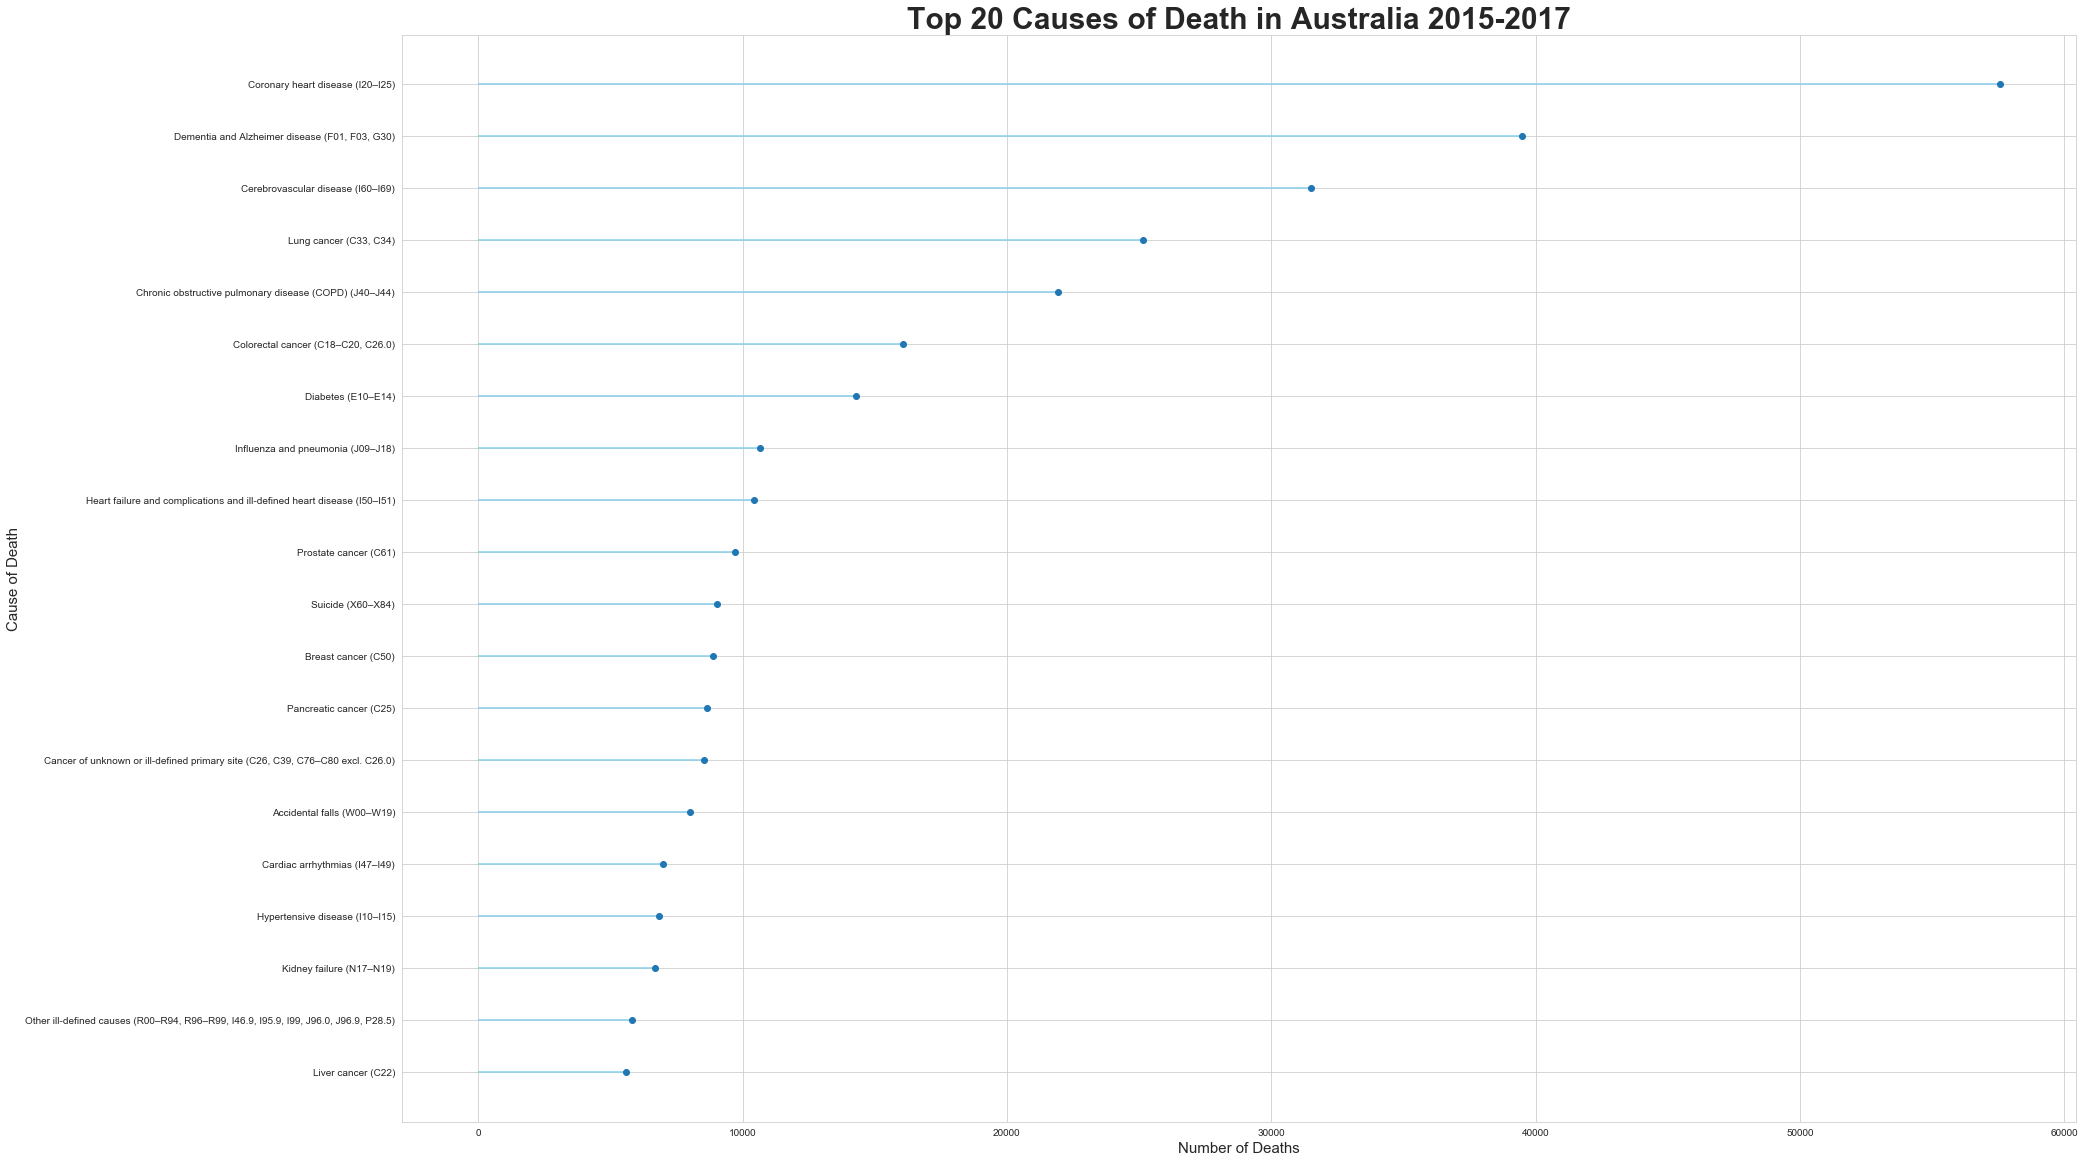

In [32]:
lollipop_chart(df=all_ages, ylabel="Cause of Death", xlabel="Number of Deaths", title="Top 20 Causes of Death in Australia 2015-2017")

In [33]:
def donut_chart(df=all_ages, title="Top 20 Causes of Death in Australia 2018" , x=all_ages_colour):
    my_circle = plt.Circle((0,0),0.7, color='white')
    plt.figure(figsize=(40, 20))
    plt.pie(df['Number of Deaths'], labels=df['Cause'], colors=x)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(label= title, fontsize=28, fontweight='bold')
    plt.show()

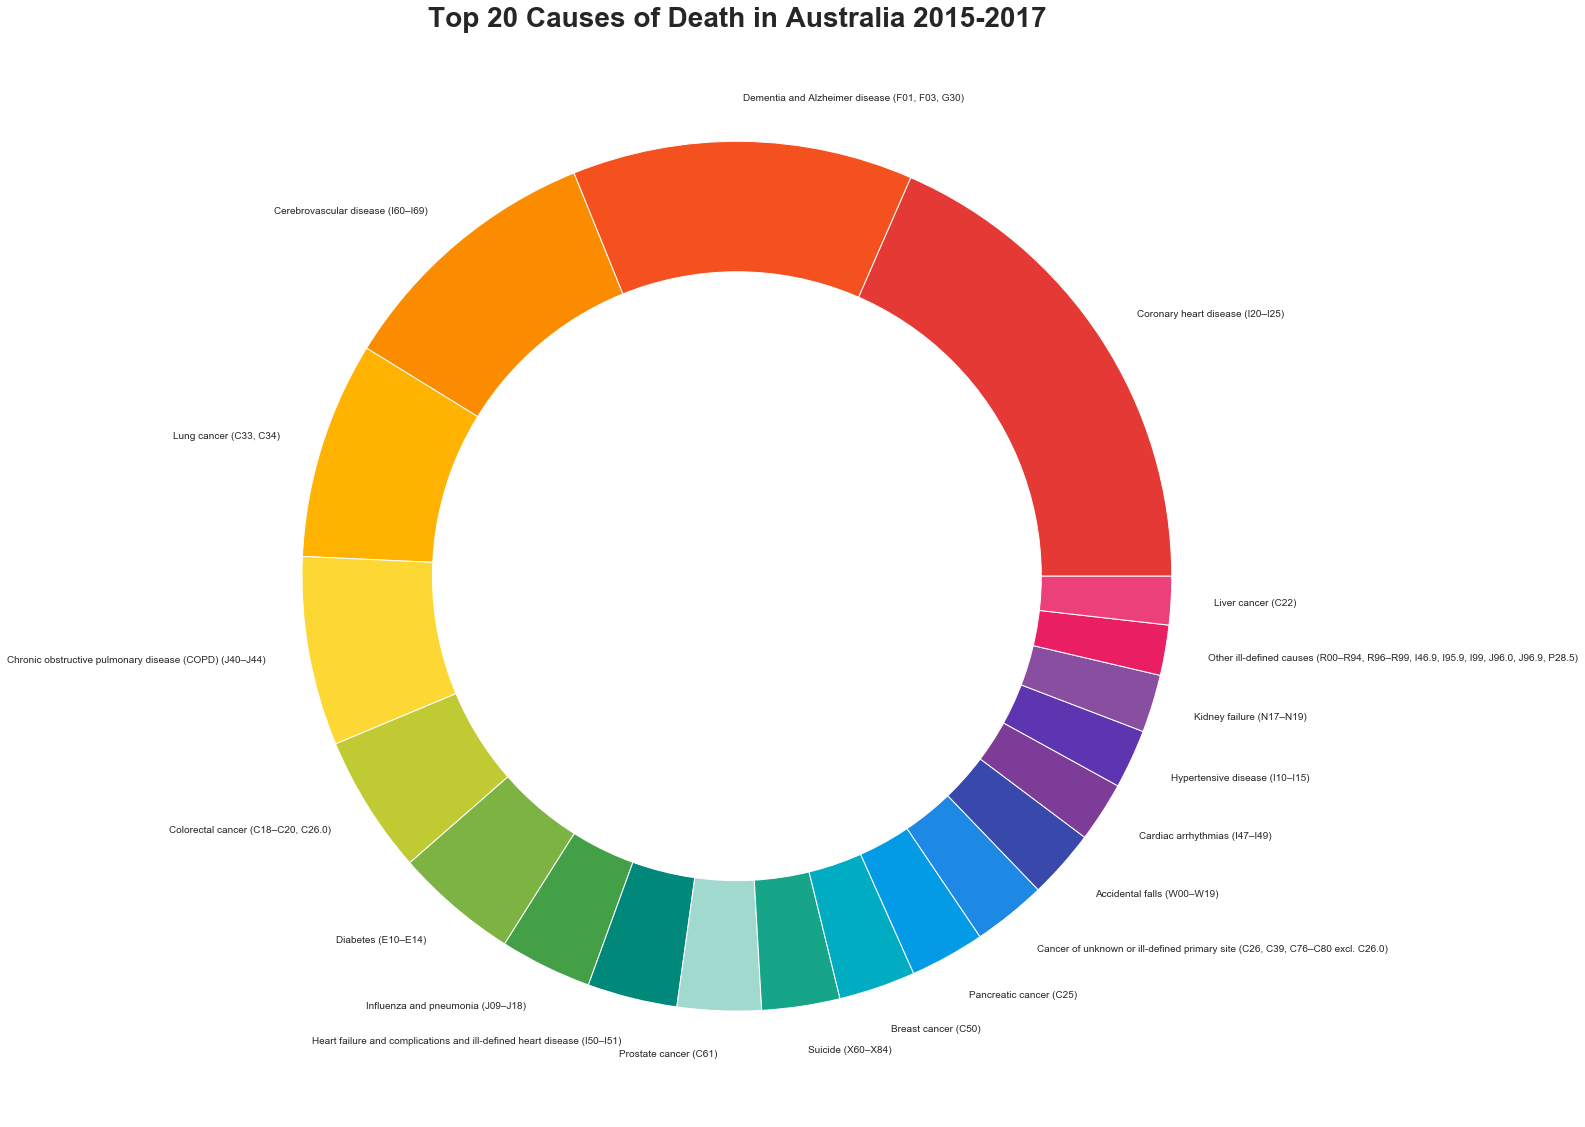

In [34]:
donut_chart(df=all_ages, title="Top 20 Causes of Death in Australia 2015-2017" , x=all_ages_colour)

In [35]:
def bar_chart(df=all_ages, title="Top 20 Causes of Death in Australia 2015-2017",x=all_ages_colour):
    y_pos = np.arange(len(df['Cause']))
    plt.figure(figsize=(30, 15))
    plt.bar(y_pos, df['Number of Deaths'], color=x)
    plt.xticks(y_pos, df['Cause'], rotation=45, ha="right")
    plt.title(label= title, fontsize=35, fontweight='bold')
    plt.xlabel("Number of Deaths", fontsize=20)
    plt.ylabel("Causes of Death", fontsize=20)
    plt.show()

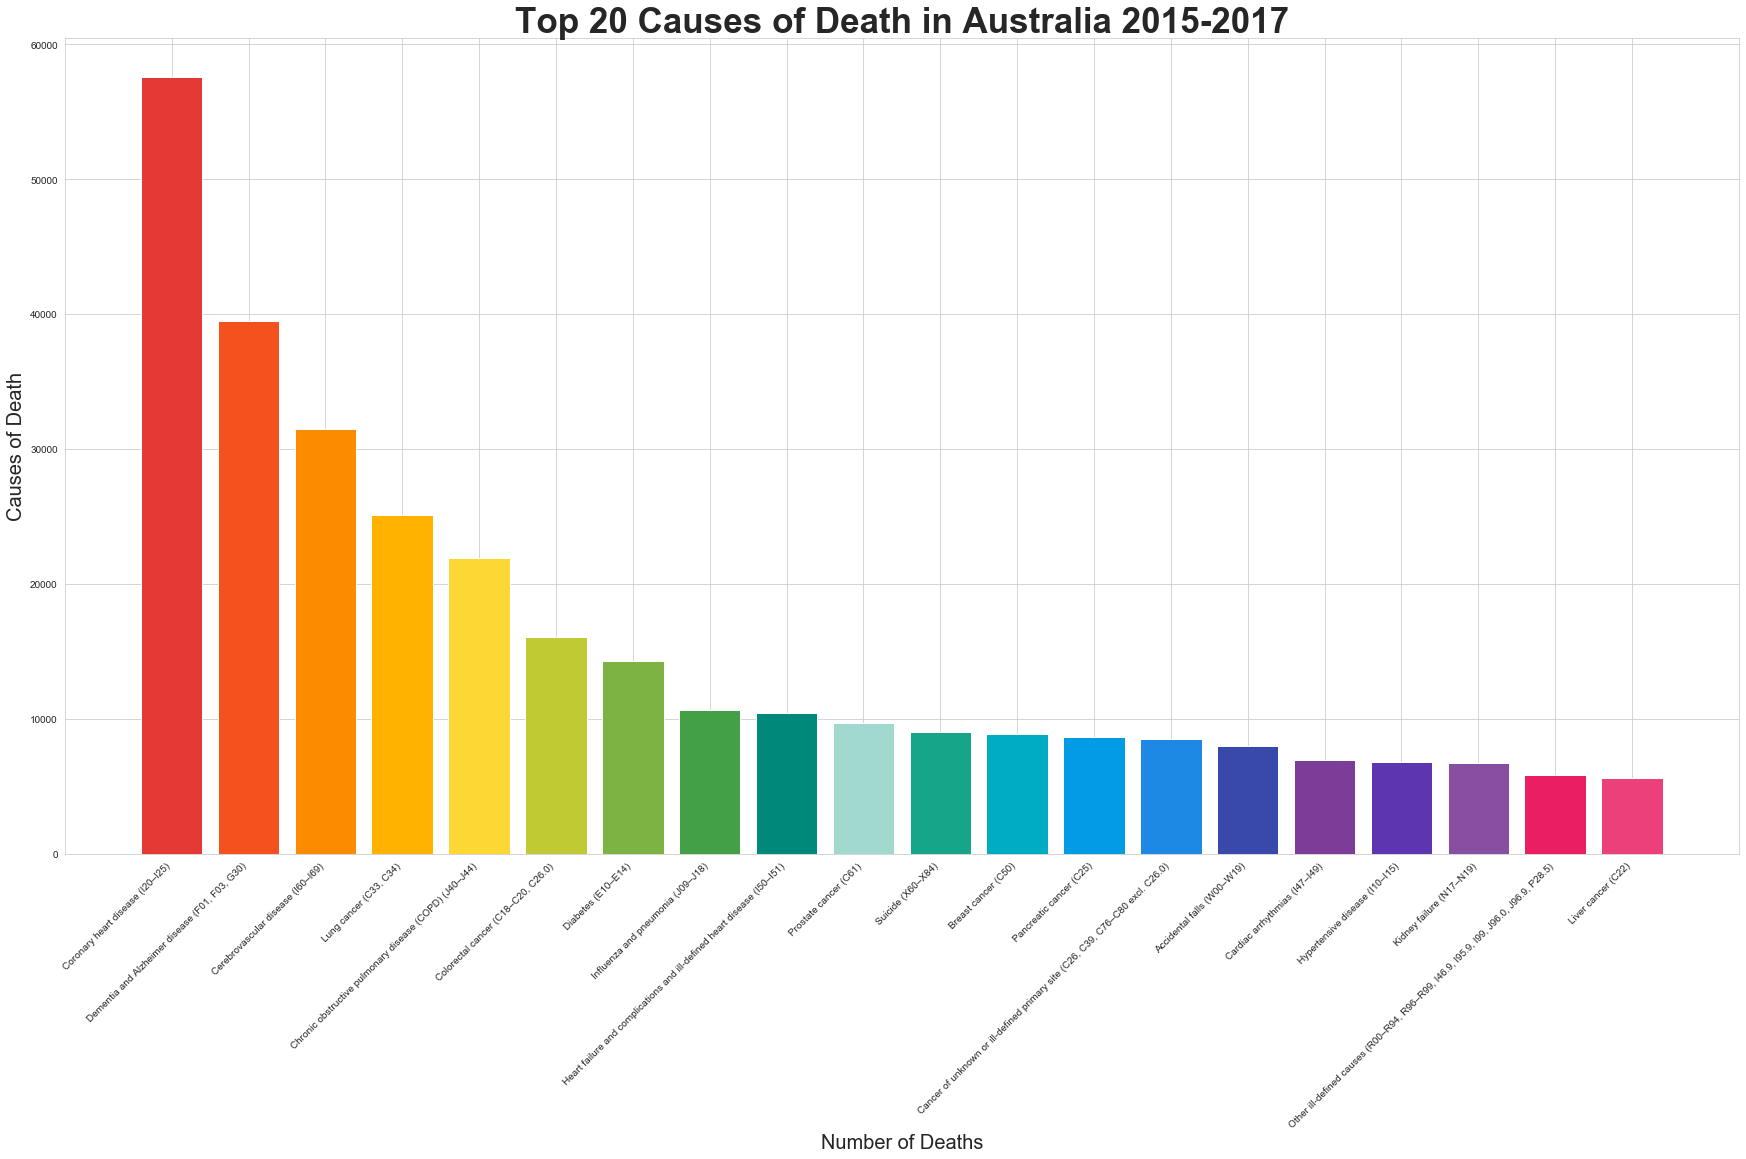

In [36]:
bar_chart(df=all_ages, title="Top 20 Causes of Death in Australia 2015-2017",x=all_ages_colour)

# How are the Top 20 Leading Causes of Death distributed amongst each Age Group?

In [37]:
Top20 = causes[(causes['Cause'] == 'Coronary heart disease (I20–I25)')| (causes['Cause'] == 'Dementia and Alzheimer disease (F01, F03, G30)')| (causes['Cause'] == 'Cerebrovascular disease (I60–I69)')| (causes['Cause'] == 'Lung cancer (C33, C34)')| (causes['Cause'] == 'Chronic obstructive pulmonary disease (COPD) (J40–J44)')| (causes['Cause'] == 'Colorectal cancer (C18–C20, C26.0)')| (causes['Cause'] == 'Diabetes (E10–E14)')| (causes['Cause'] == 'Influenza and pneumonia (J09–J18)')| (causes['Cause'] == 'Heart failure and complications and ill-defined heart disease (I50–I51)')| (causes['Cause'] == 'Prostate cancer (C61)')| (causes['Cause'] == 'Suicide (X60–X84)')| (causes['Cause'] == 'Breast cancer (C50)')| (causes['Cause'] == 'Pancreatic cancer (C25)')| (causes['Cause'] == 'Cancer of unknown or ill-defined primary site (C26, C39, C76–C80 excl. C26.0)')| (causes['Cause'] == 'Accidental falls (W00–W19)')| (causes['Cause'] == 'Cardiac arrhythmias (I47–I49)')| (causes['Cause'] == 'Hypertensive disease (I10–I15)')| (causes['Cause'] == 'Kidney failure (N17–N19)')| (causes['Cause'] == 'Other ill-defined causes (R00–R94, R96–R99, I46.9, I95.9, I99, J96.0, J96.9, P28.5)')| (causes['Cause'] == 'Liver cancer (C22)')][causes.Age != 'All ages'][causes.Age != 'Under 1']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [38]:
def heatmap(df=Top20, title="Number of Deaths by Top 20 Causes for each Age Group Australia 2015-2017"):
    plt.figure(figsize=(40, 25))
    data1 = pd.pivot_table(df, values='Number of Deaths', index=['Cause'], columns='Age')
    sns.heatmap(data1, cmap='PuBuGn')
    plt.title(title, fontsize=28,fontweight='bold', loc='left')
    plt.xlabel("Age", fontsize=20)
    plt.ylabel("Cause", fontsize=20)
    plt.show()

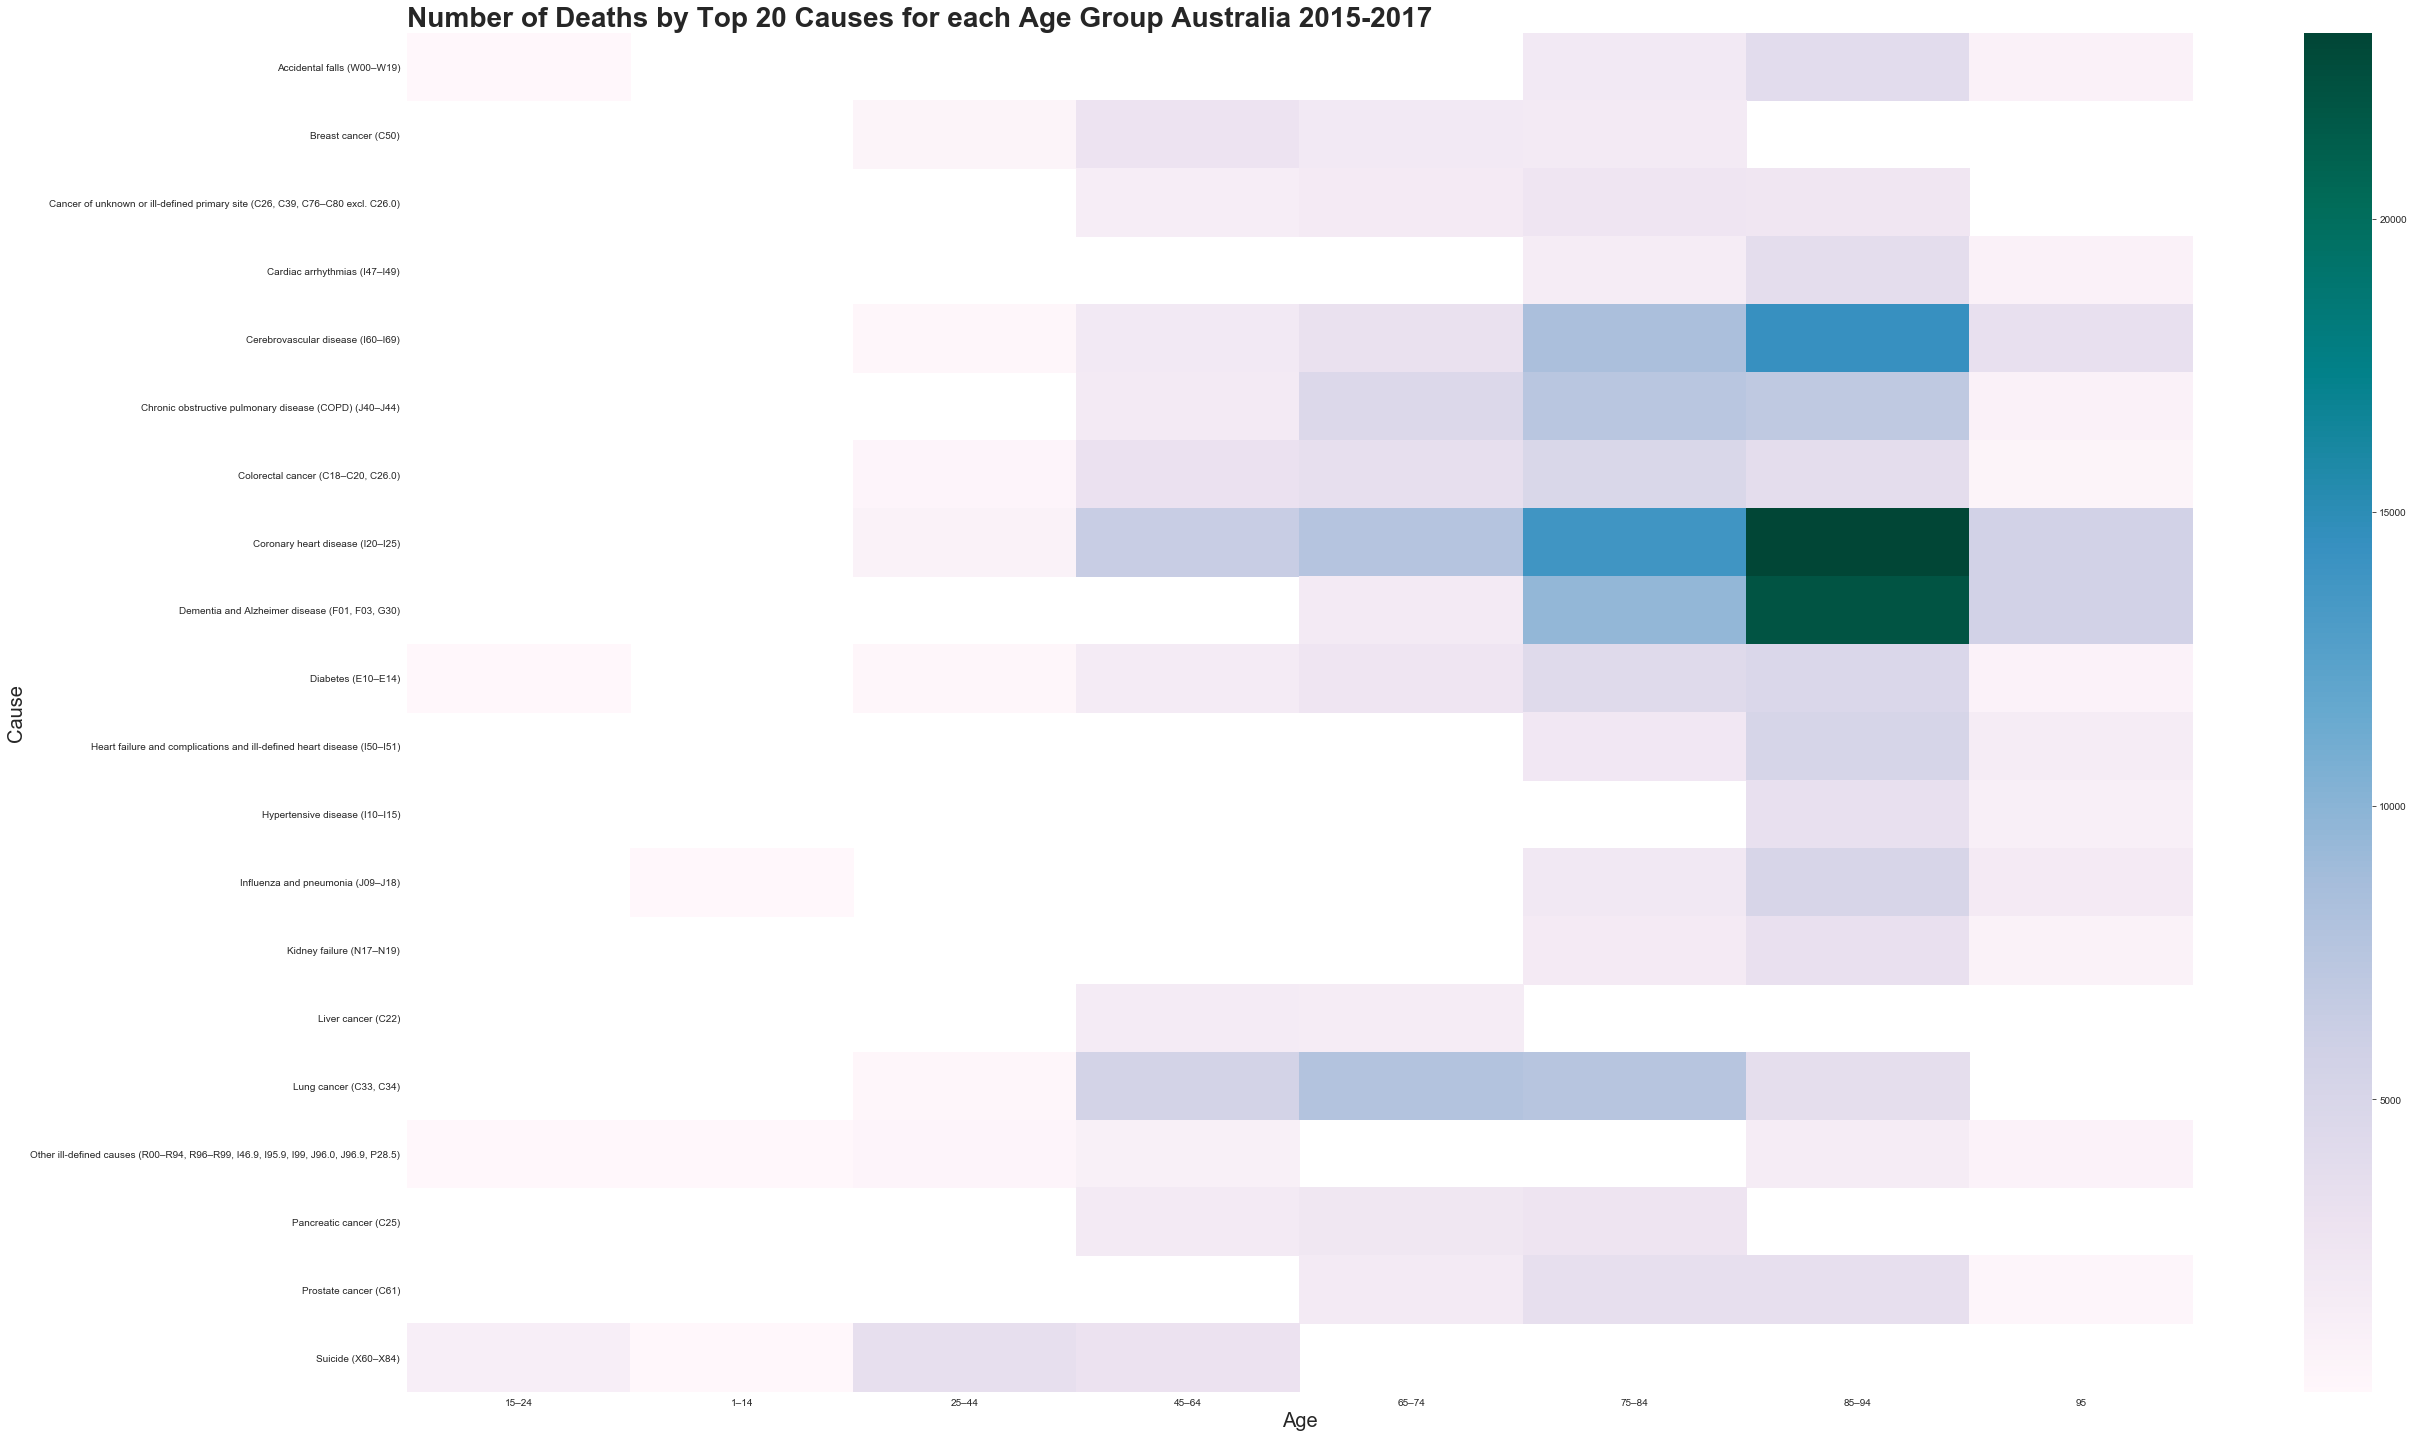

In [39]:
heatmap(df=Top20, title="Number of Deaths by Top 20 Causes for each Age Group Australia 2015-2017")

## If majority of the leading causes for the first three age groups are not in the Top 20, what are they?

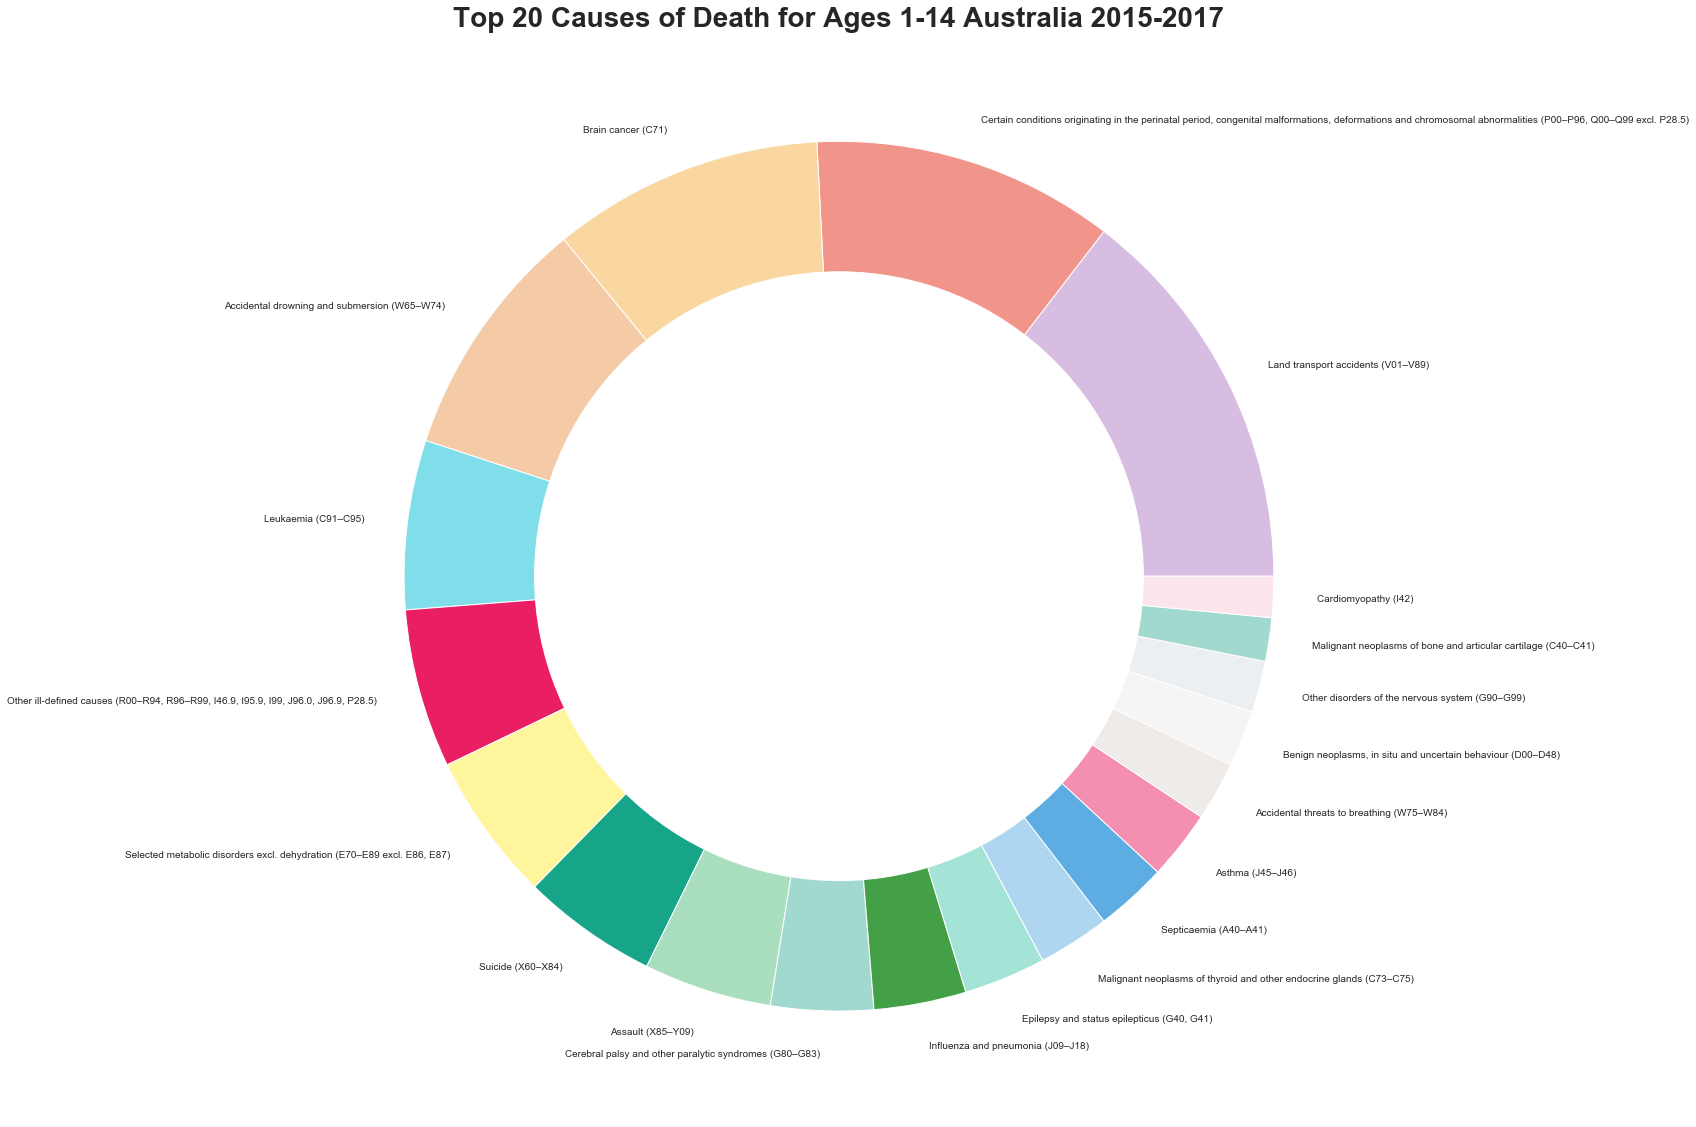

In [40]:
donut_chart(df=Group1, title="Top 20 Causes of Death for Ages 1-14 Australia 2015-2017", x=Group1_colour)

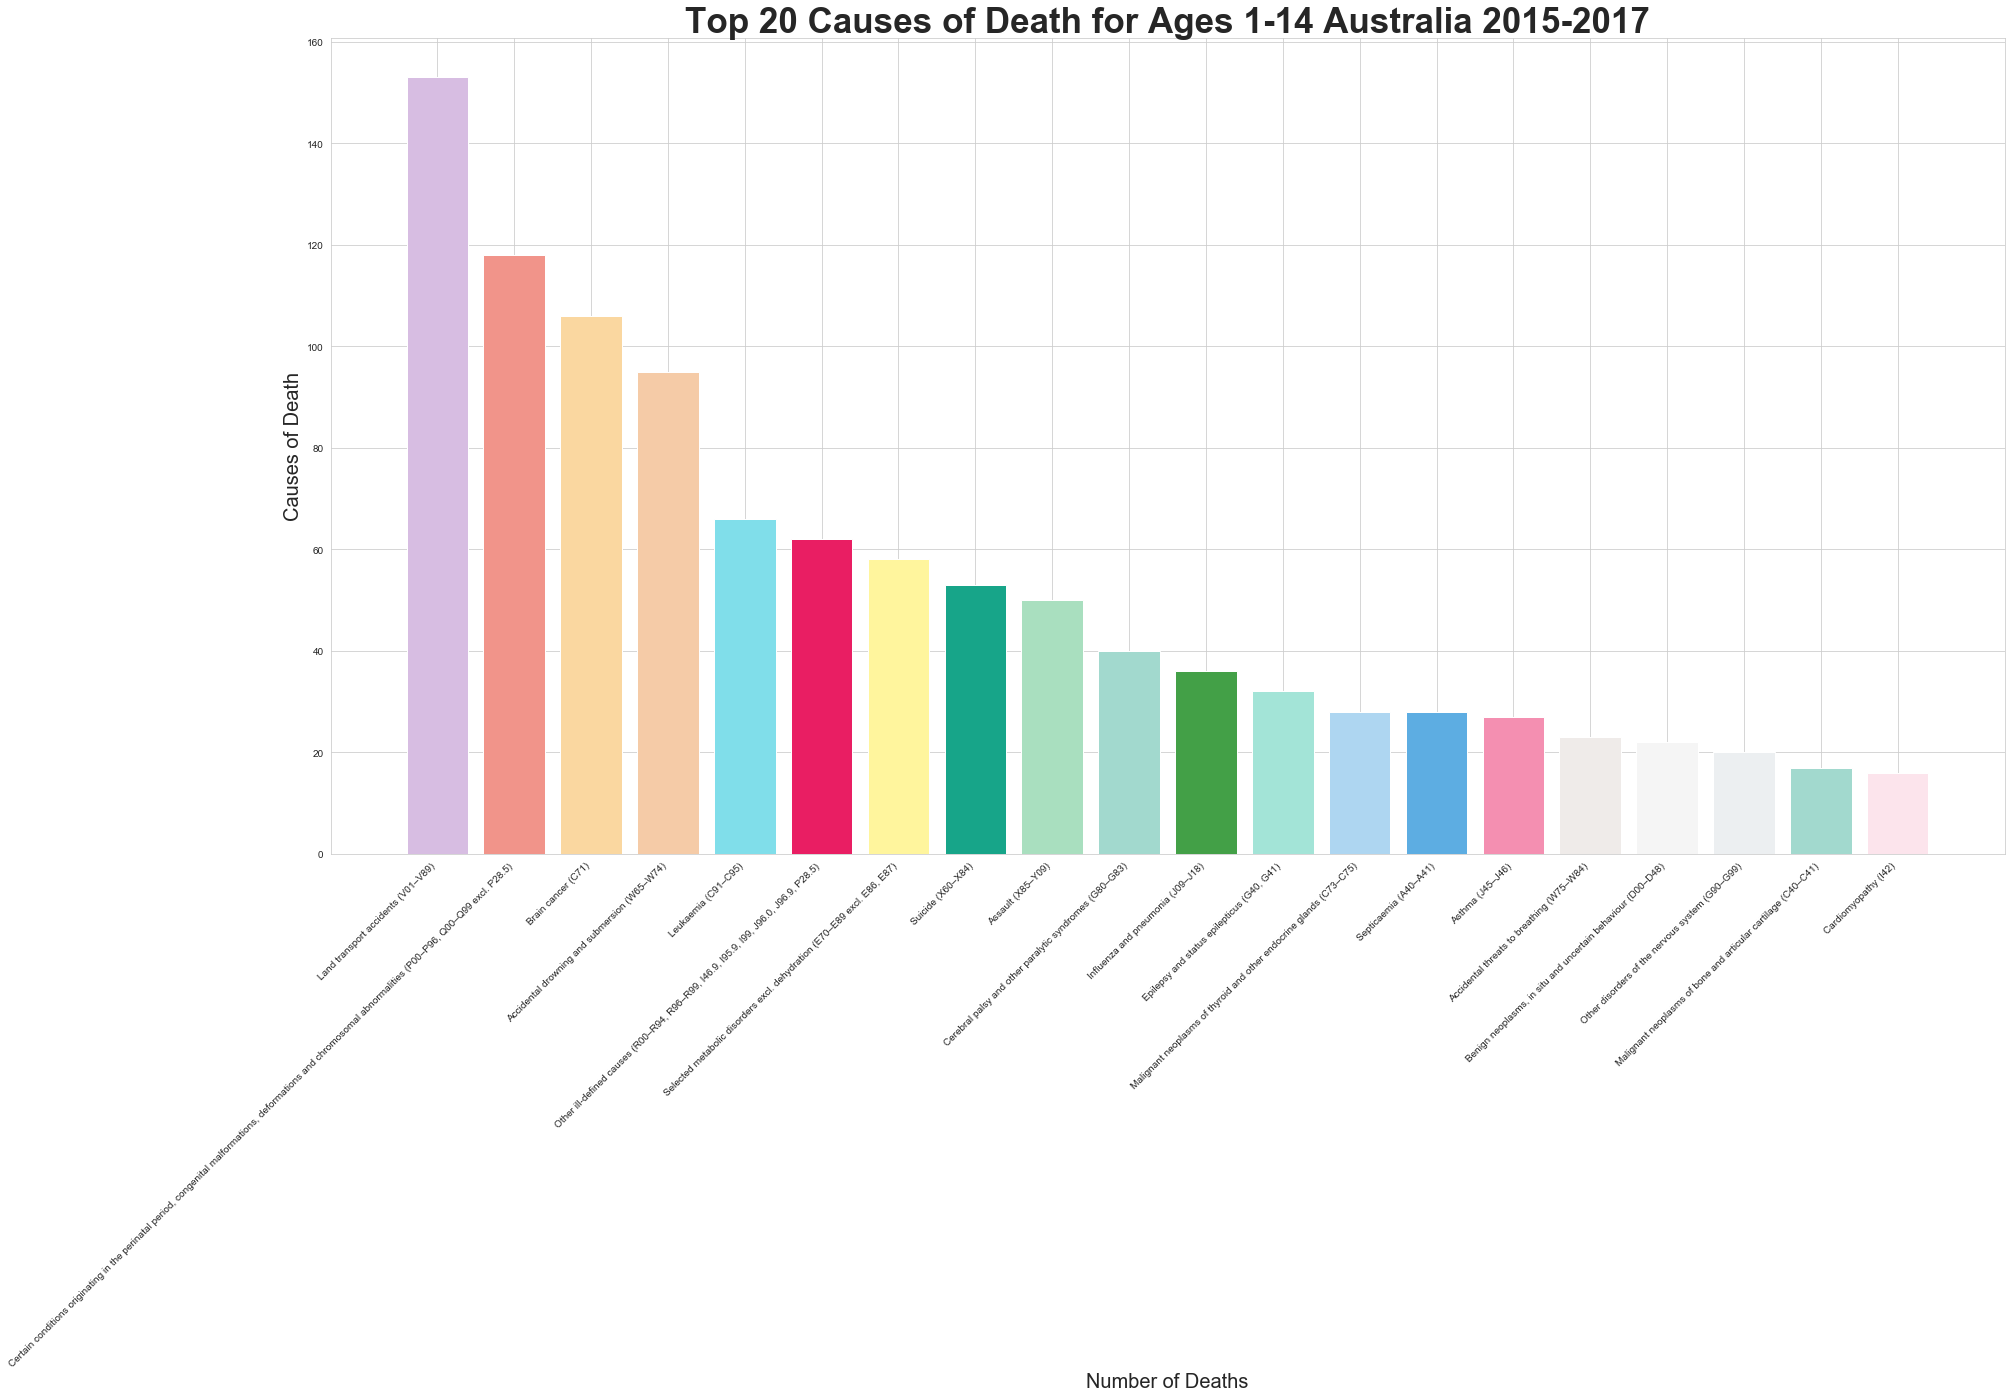

In [41]:
bar_chart(df=Group1, title="Top 20 Causes of Death for Ages 1-14 Australia 2015-2017", x=Group1_colour)

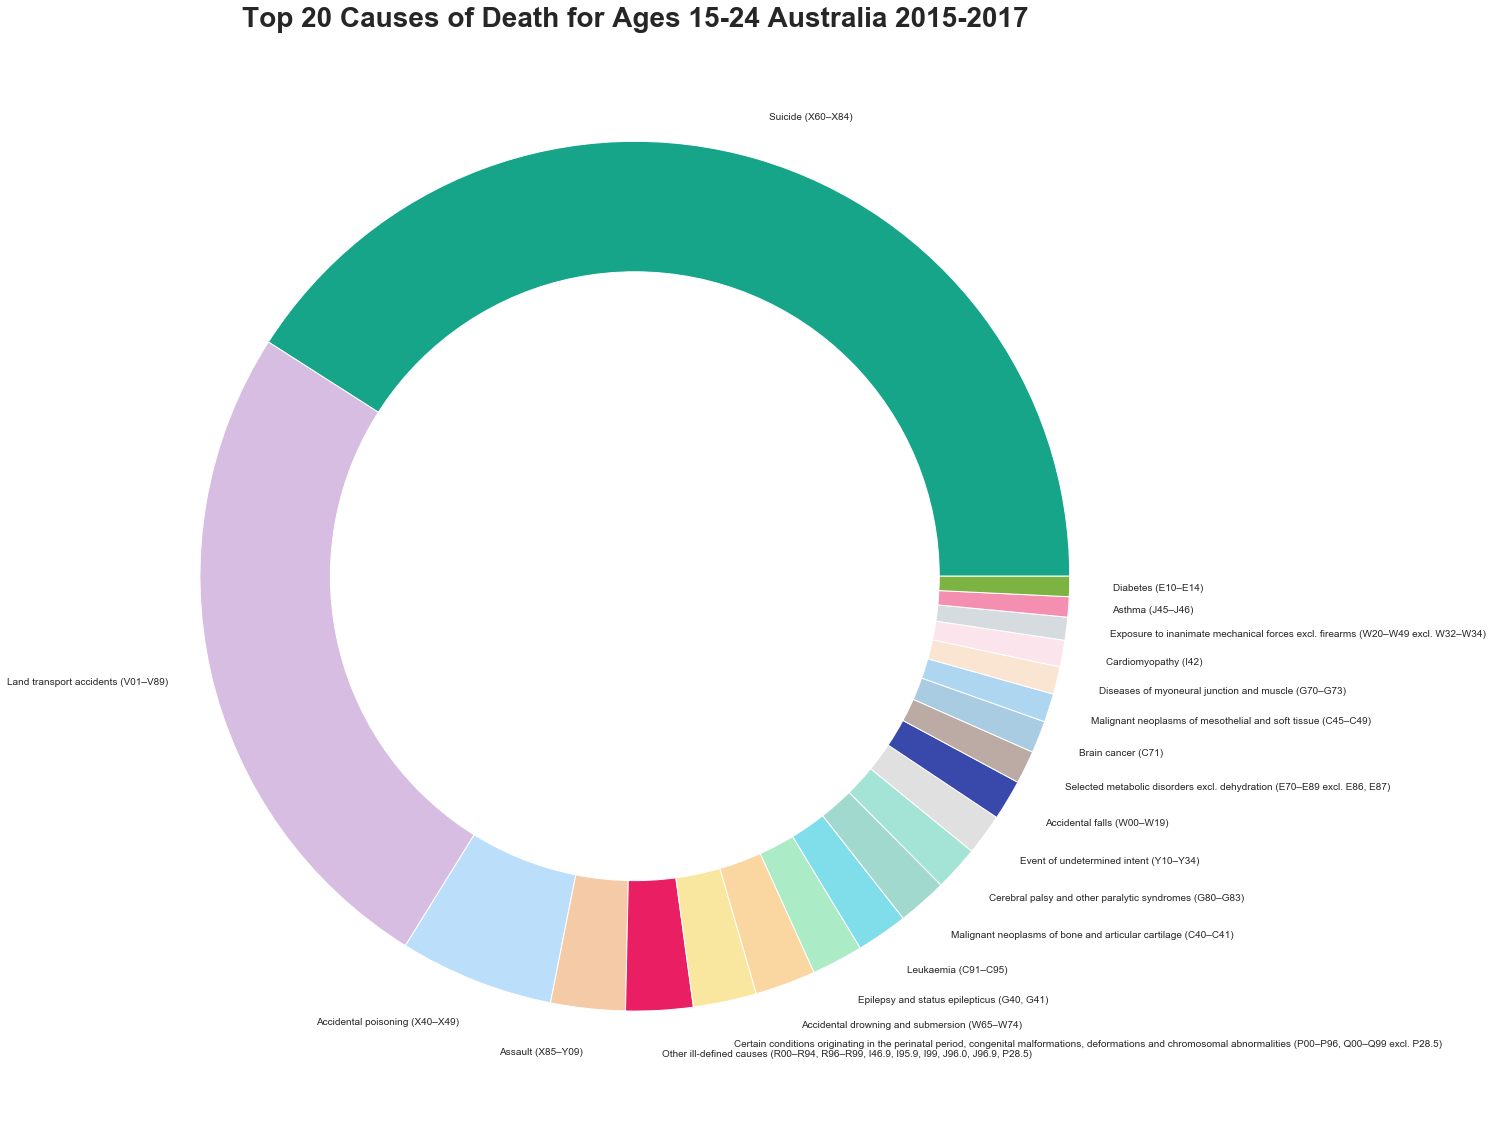

In [42]:
donut_chart(df=Group2, title="Top 20 Causes of Death for Ages 15-24 Australia 2015-2017", x=Group2_colour)

In [43]:
bar_chart(df=Group2, title="Top 20 Causes of Death for Ages 15-24 Australia 2015-2017", x=Group2_colour)

In [44]:
donut_chart(df=Group3, title="Top 20 Causes of Death for Ages 25-44 Australia 2015-2017", x=Group3_colour)

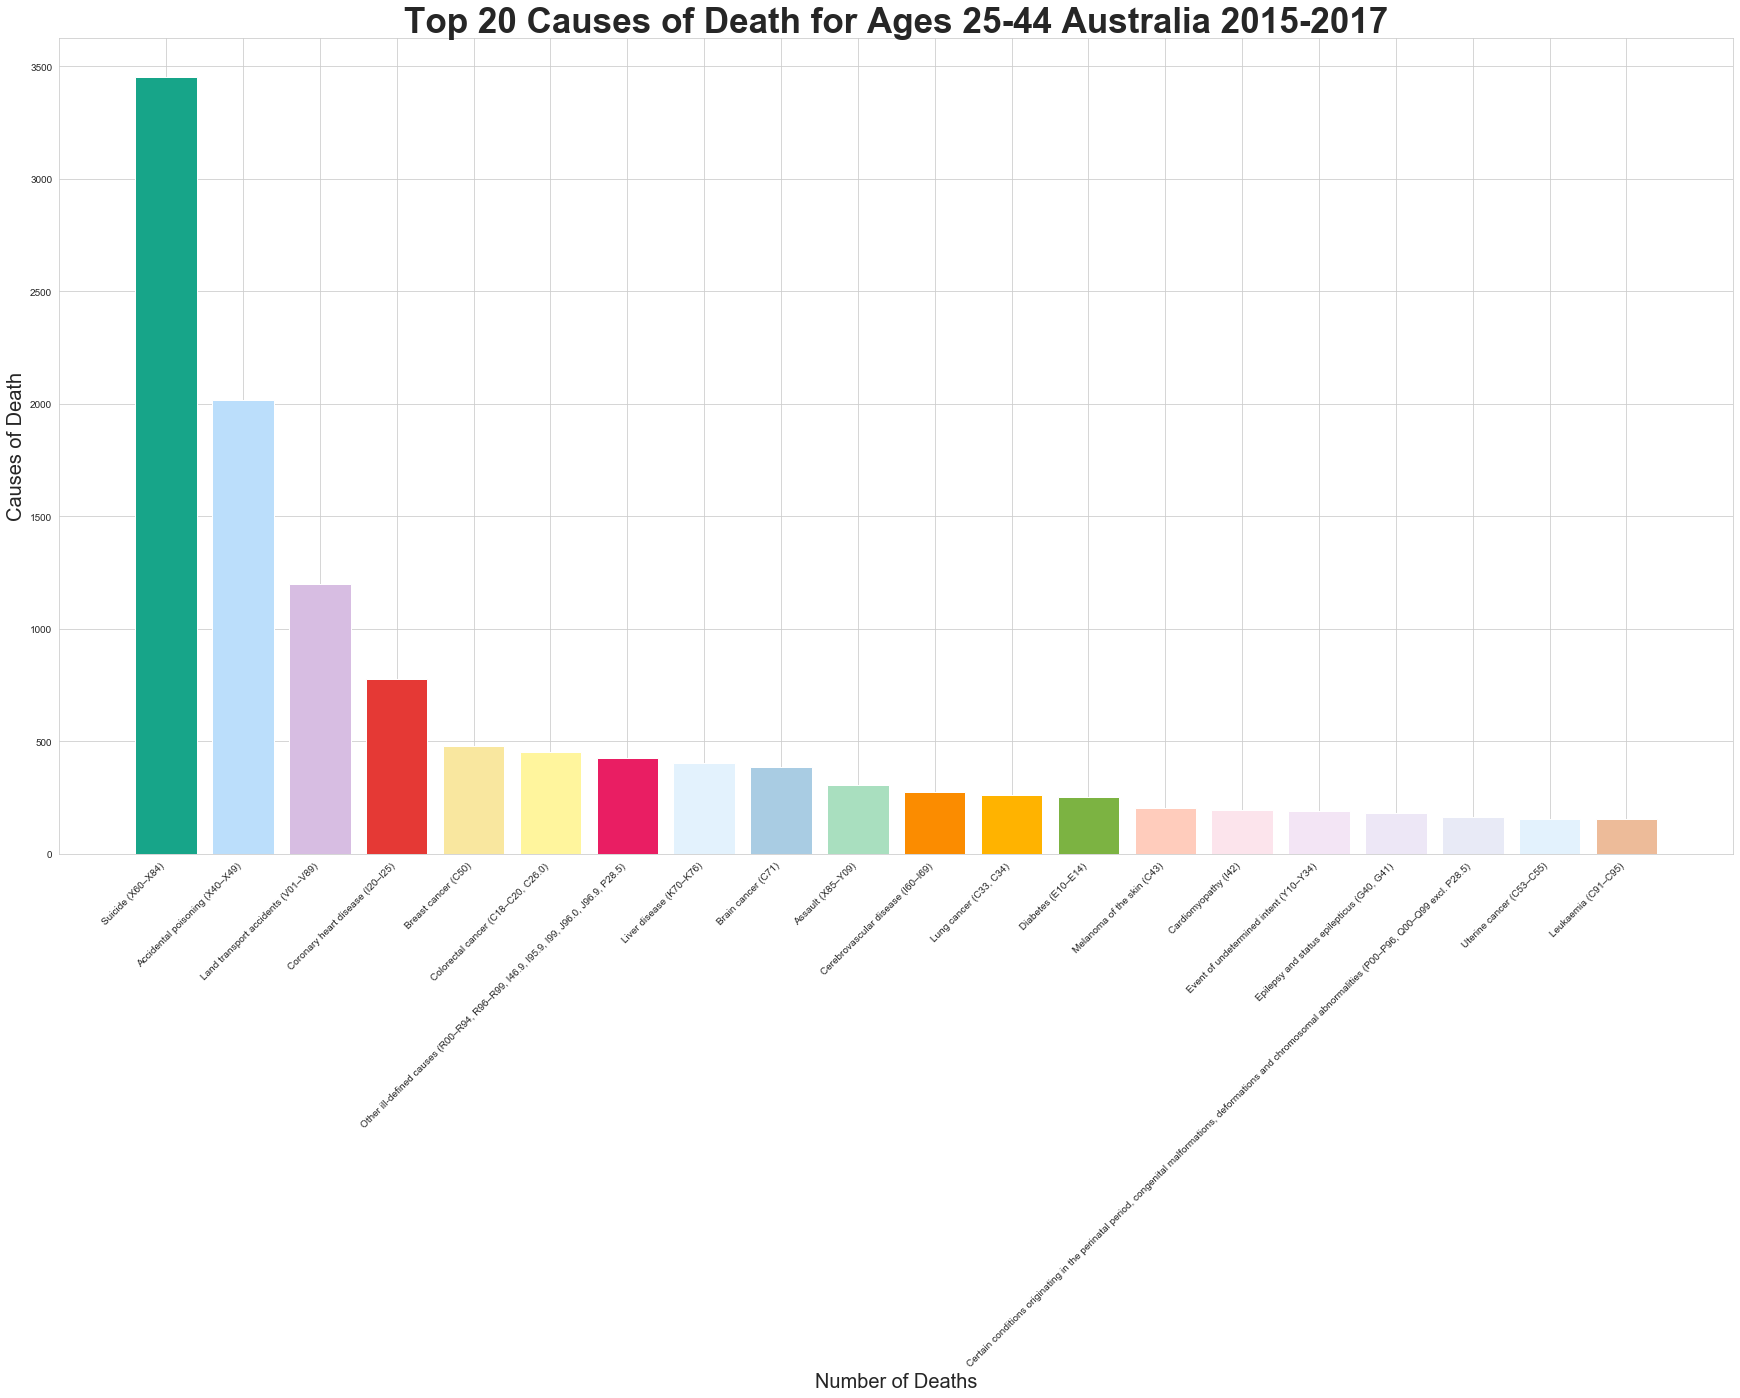

In [45]:
bar_chart(df=Group3, title="Top 20 Causes of Death for Ages 25-44 Australia 2015-2017", x=Group3_colour)

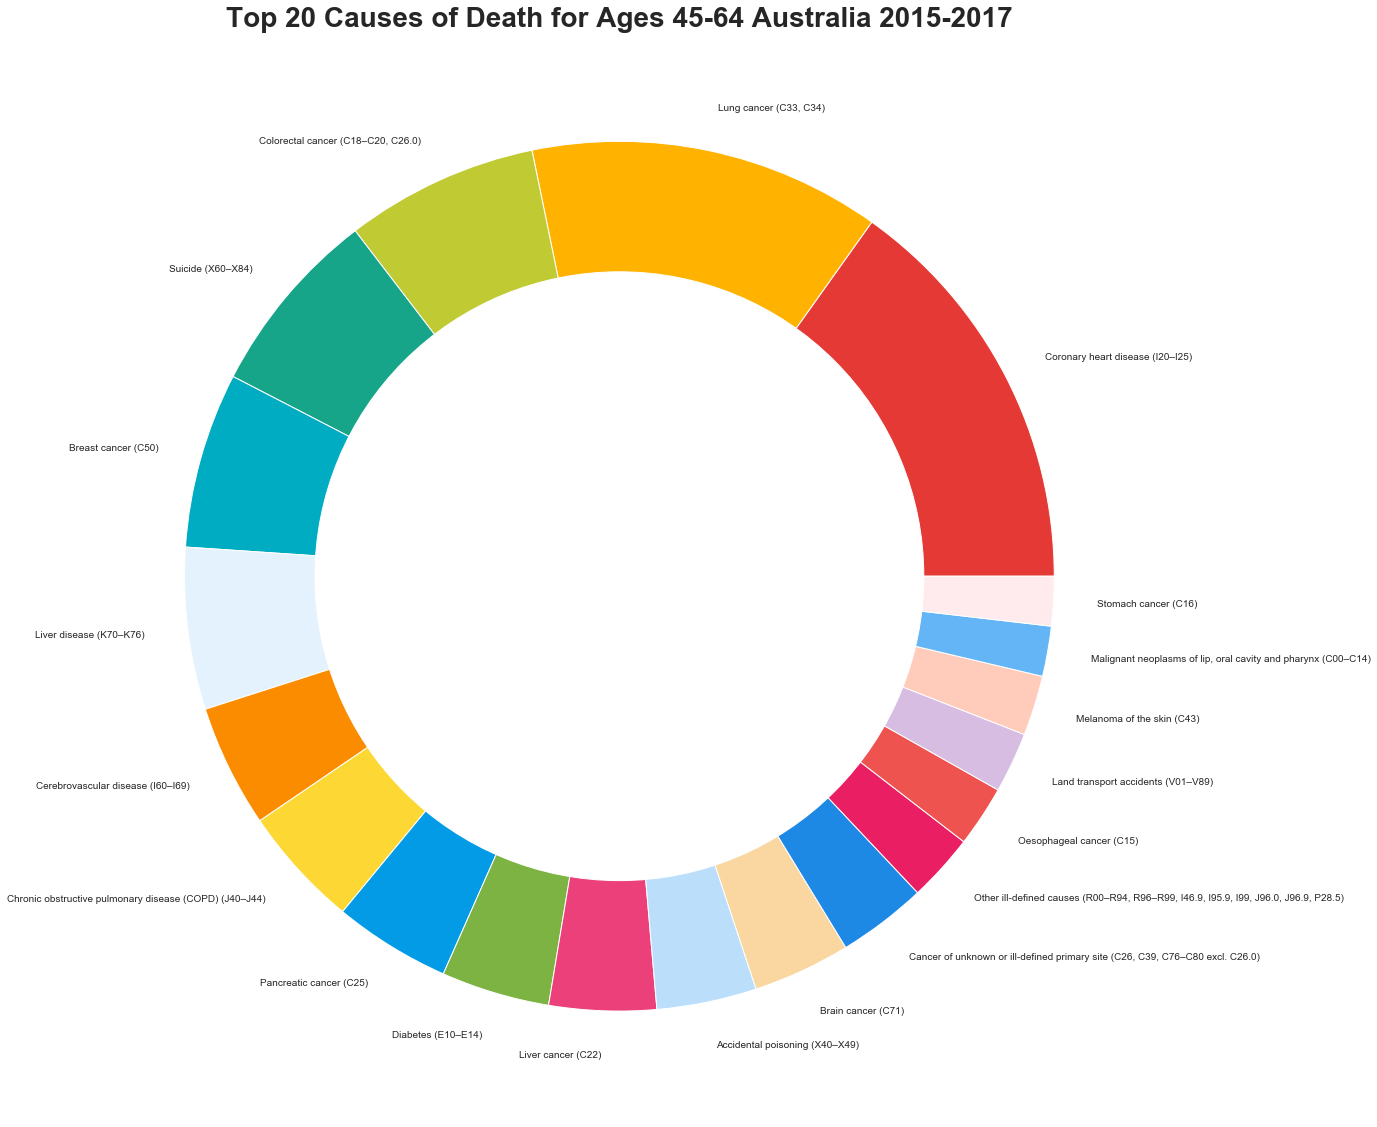

In [46]:
donut_chart(df=Group4, title="Top 20 Causes of Death for Ages 45-64 Australia 2015-2017", x=Group4_colour)

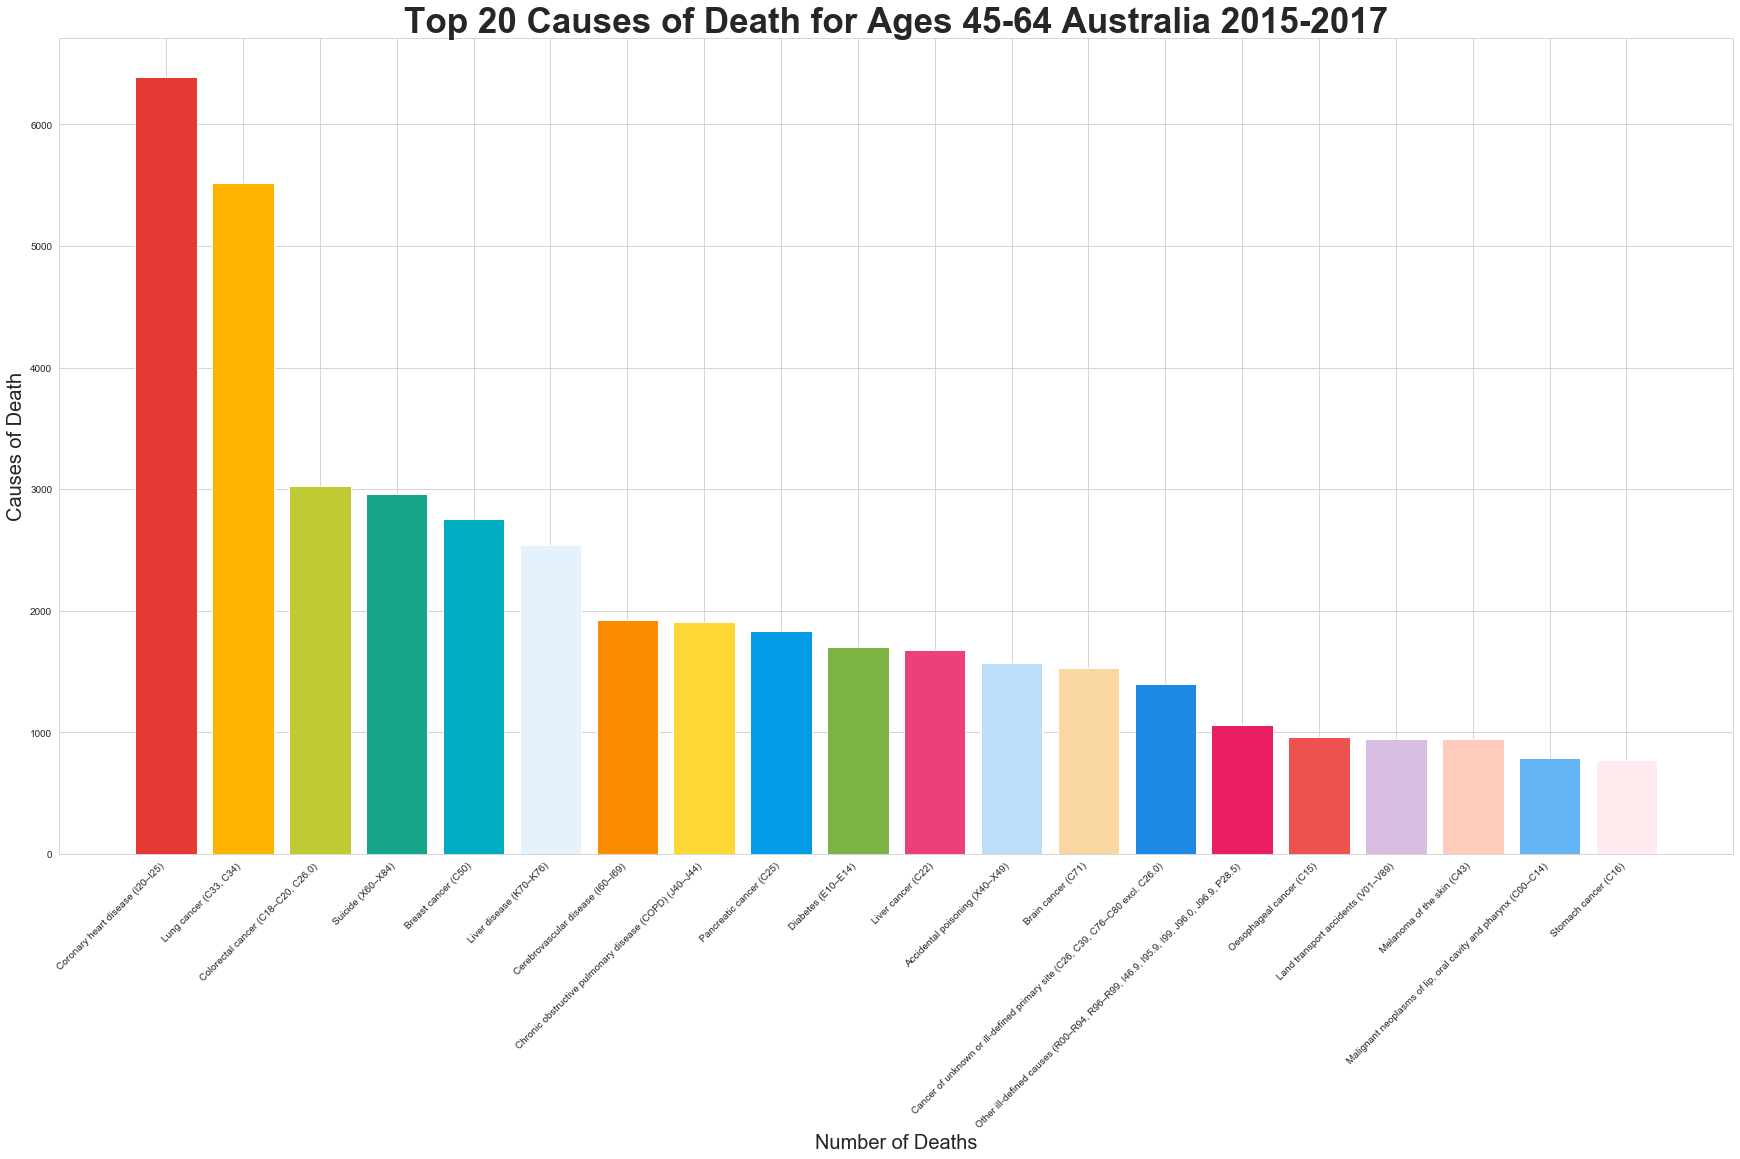

In [47]:
bar_chart(df=Group4, title="Top 20 Causes of Death for Ages 45-64 Australia 2015-2017", x=Group4_colour)

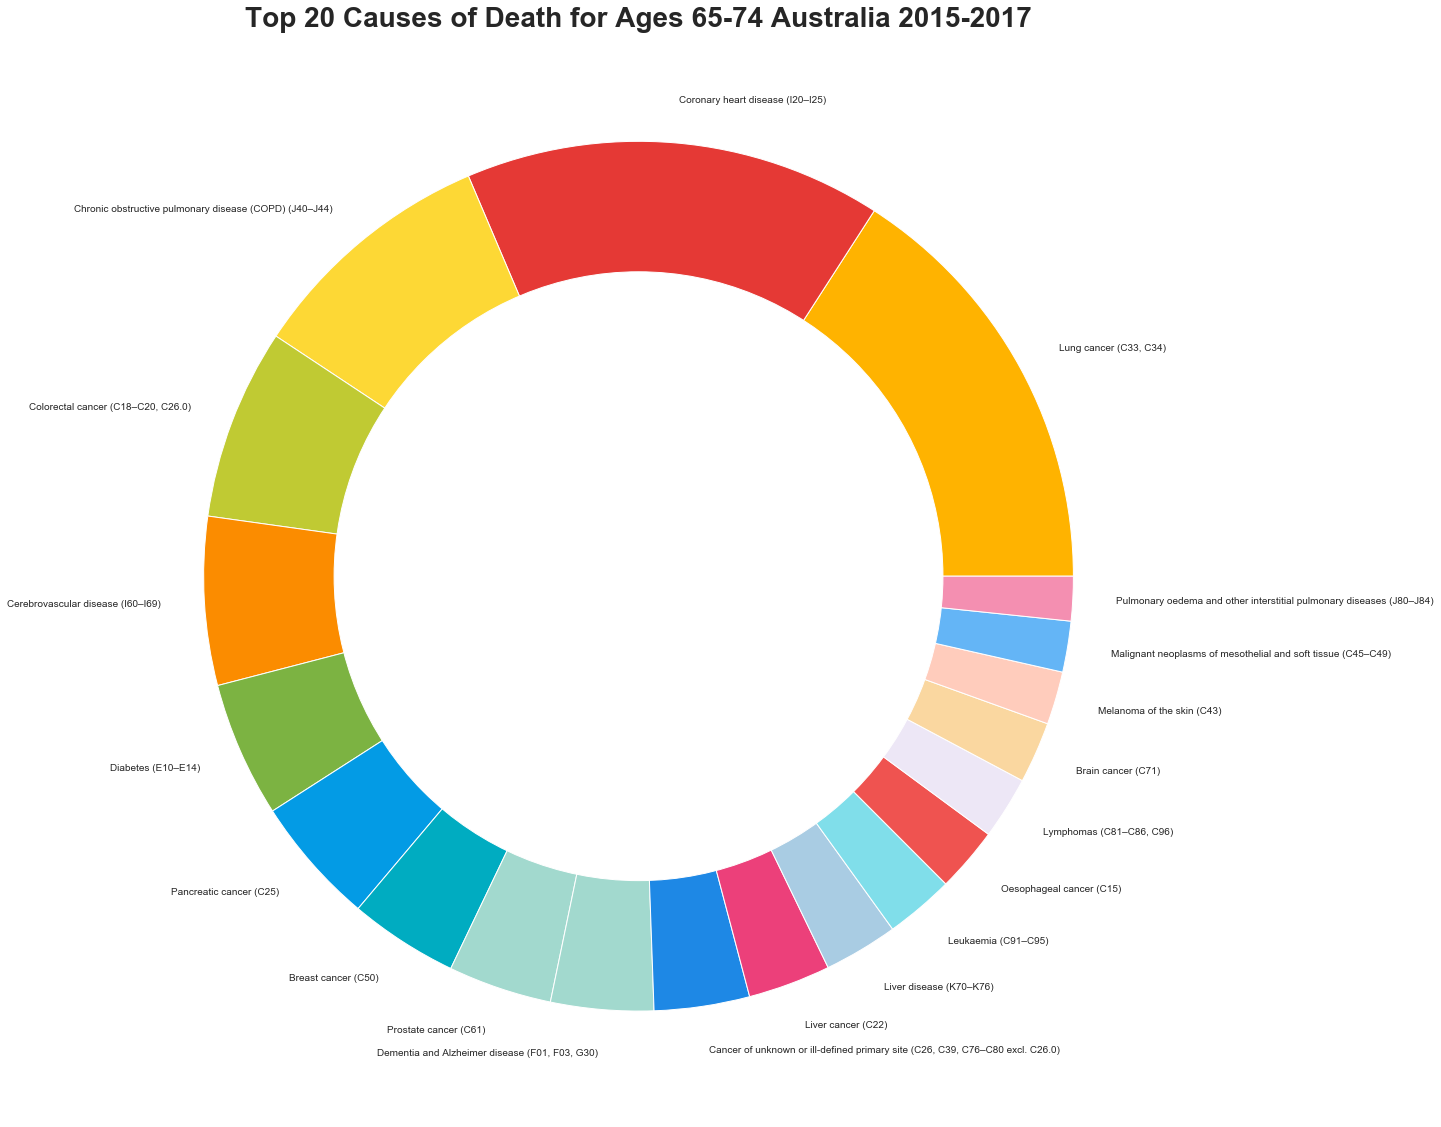

In [48]:
donut_chart(df=Group5, title="Top 20 Causes of Death for Ages 65-74 Australia 2015-2017", x=Group5_colour)

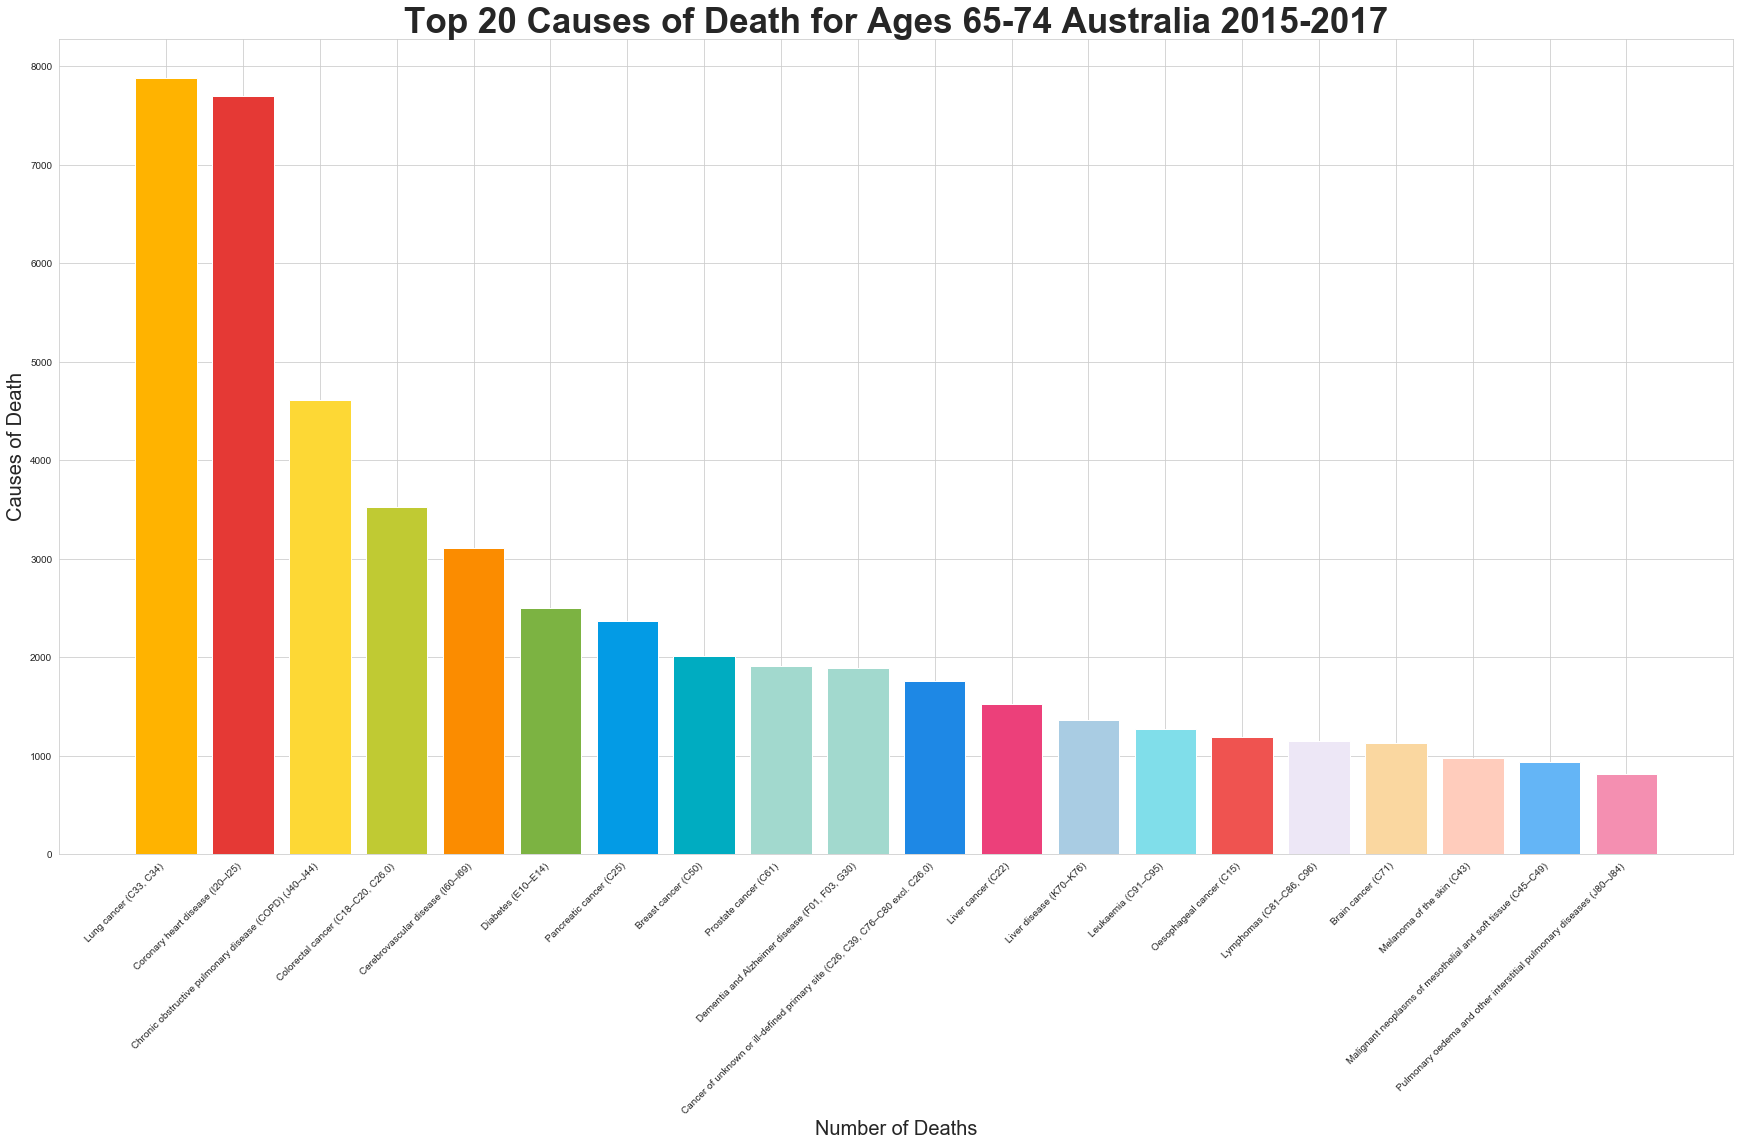

In [49]:
bar_chart(df=Group5, title="Top 20 Causes of Death for Ages 65-74 Australia 2015-2017", x=Group5_colour)

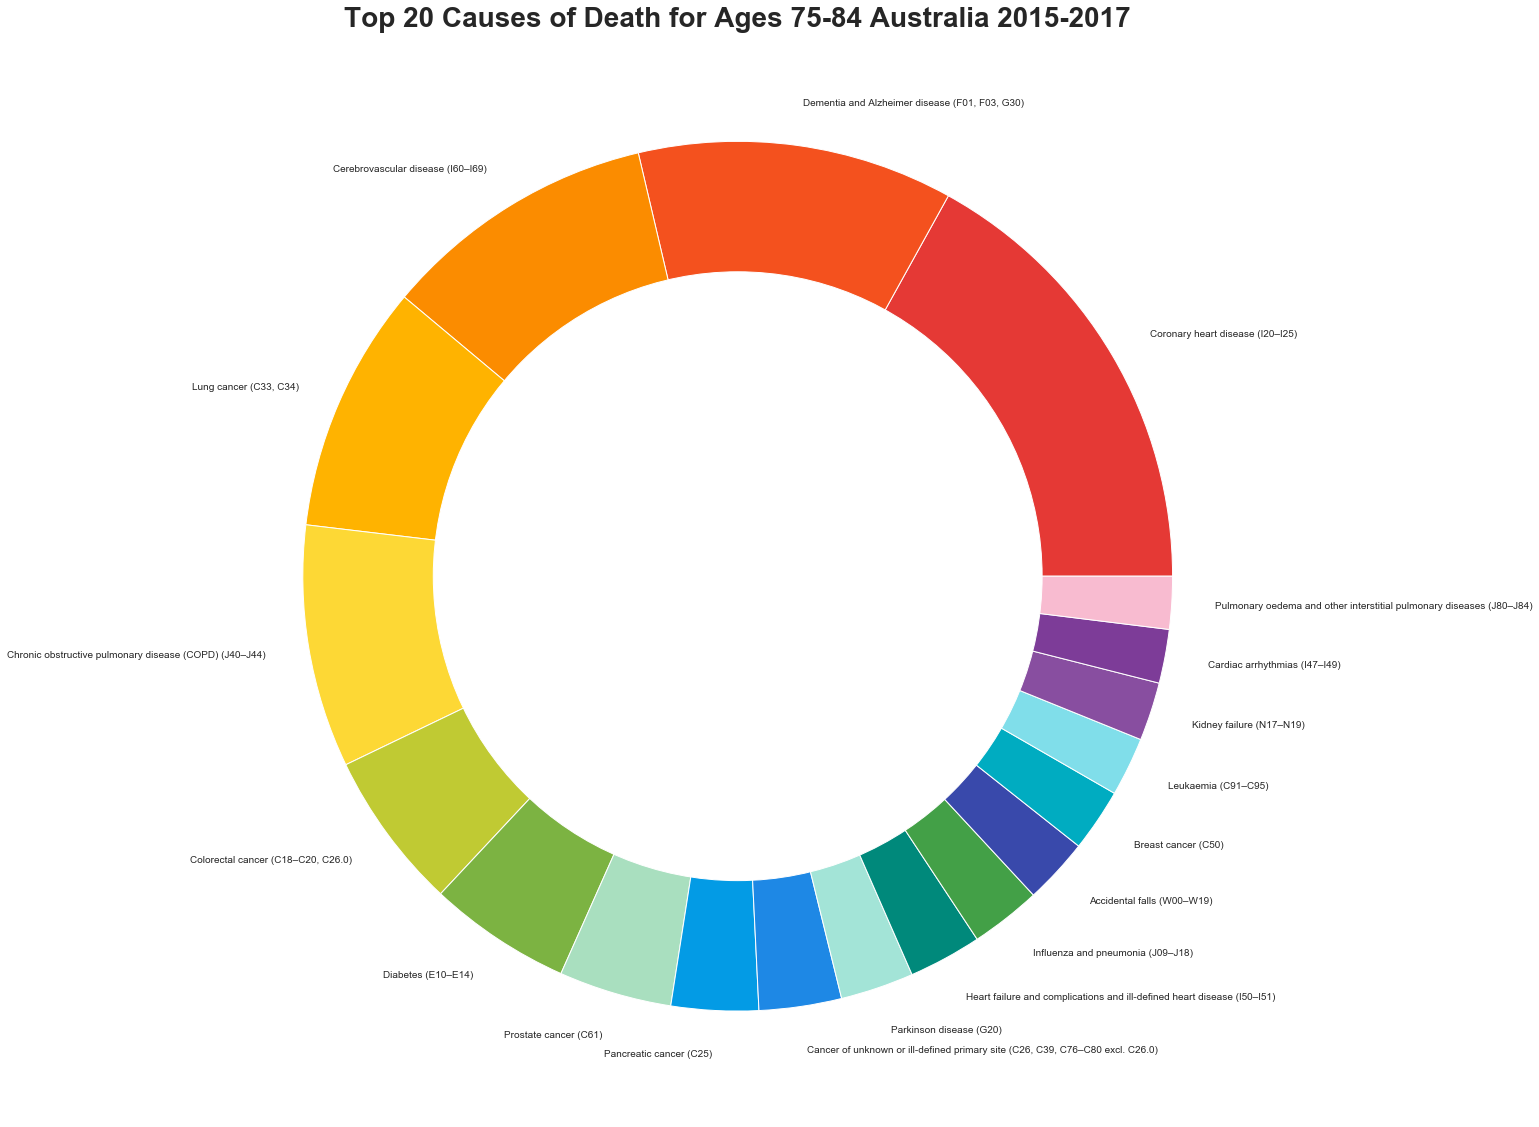

In [50]:
donut_chart(df=Group6, title="Top 20 Causes of Death for Ages 75-84 Australia 2015-2017", x=Group6_colour)

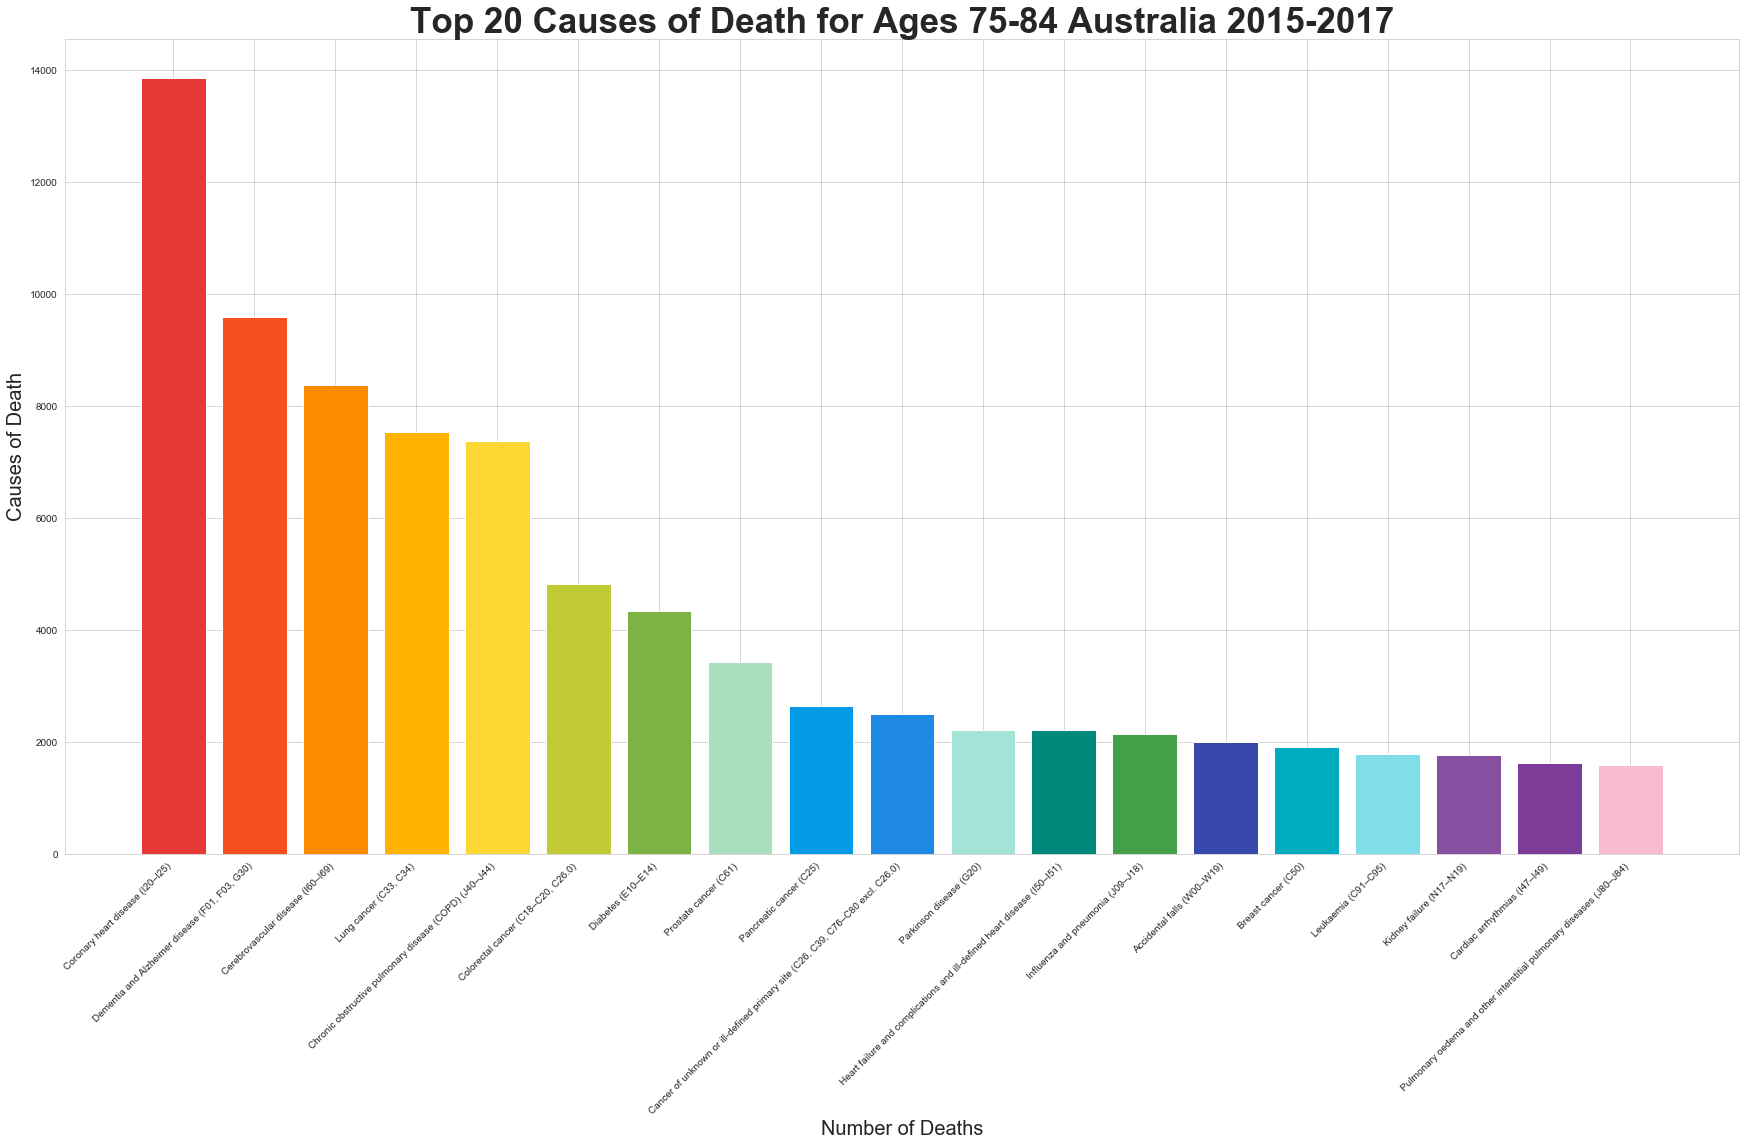

In [51]:
bar_chart(df=Group6, title="Top 20 Causes of Death for Ages 75-84 Australia 2015-2017", x=Group6_colour)

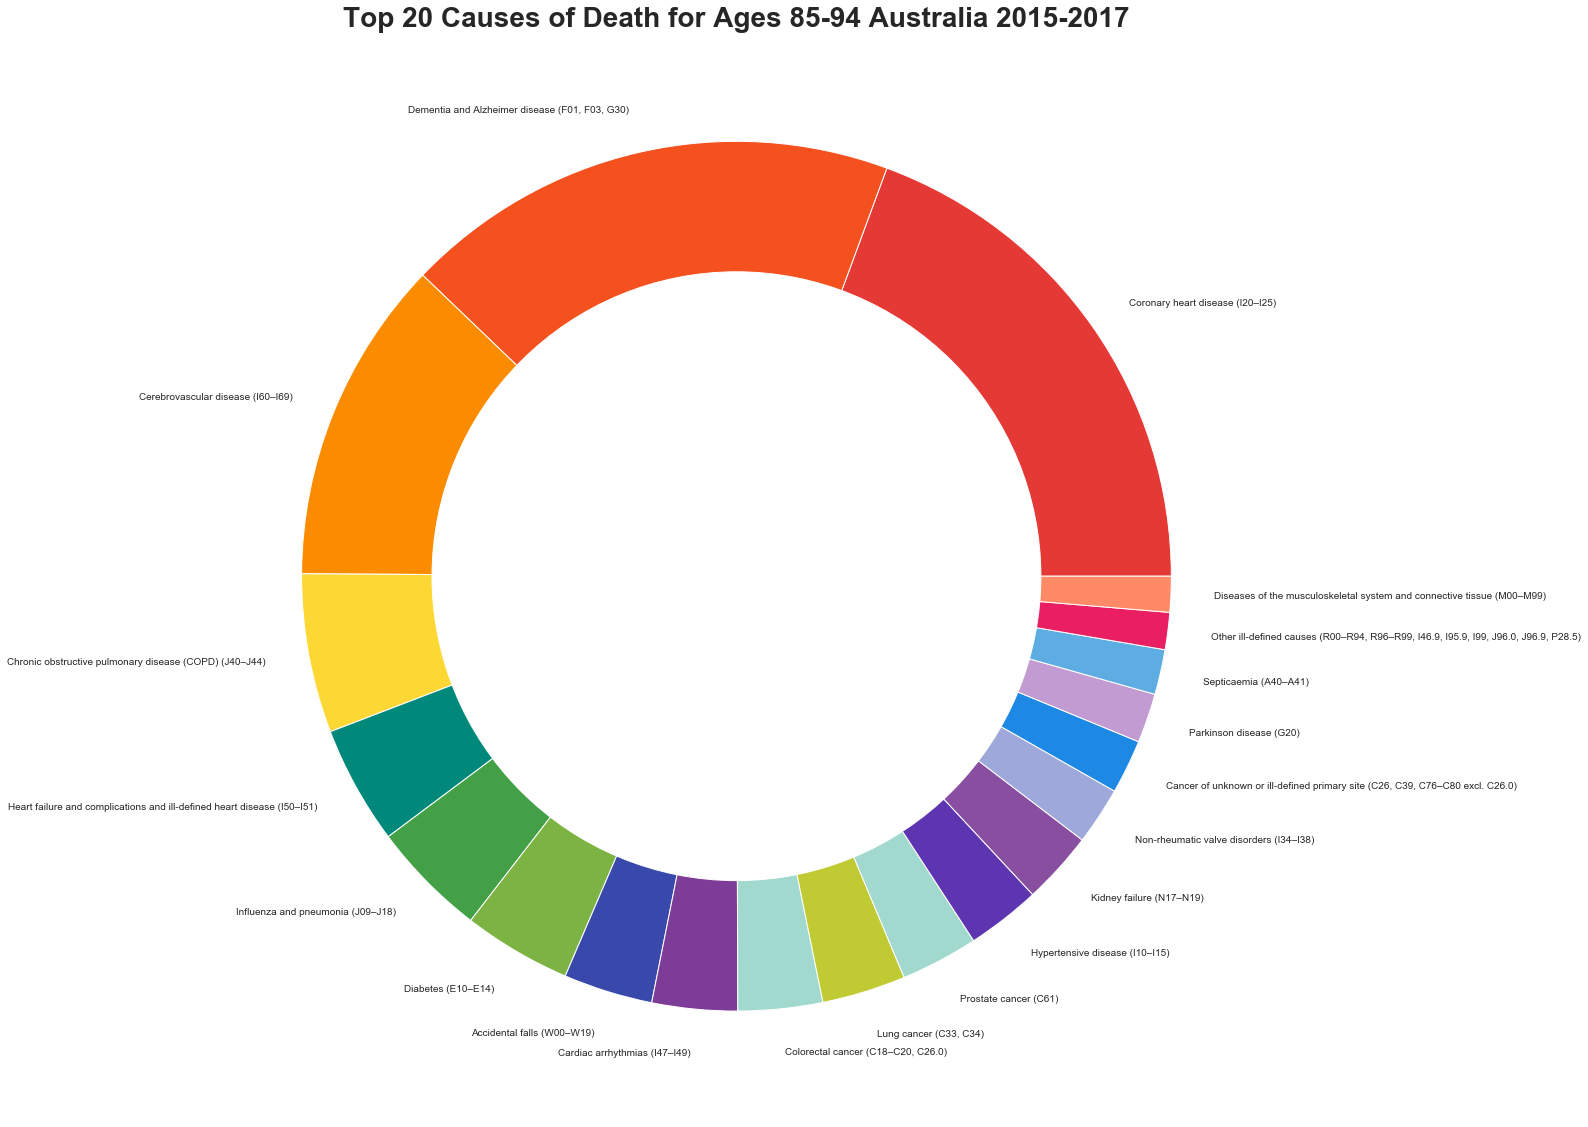

In [52]:
donut_chart(df=Group7, title="Top 20 Causes of Death for Ages 85-94 Australia 2015-2017", x=Group7_colour)

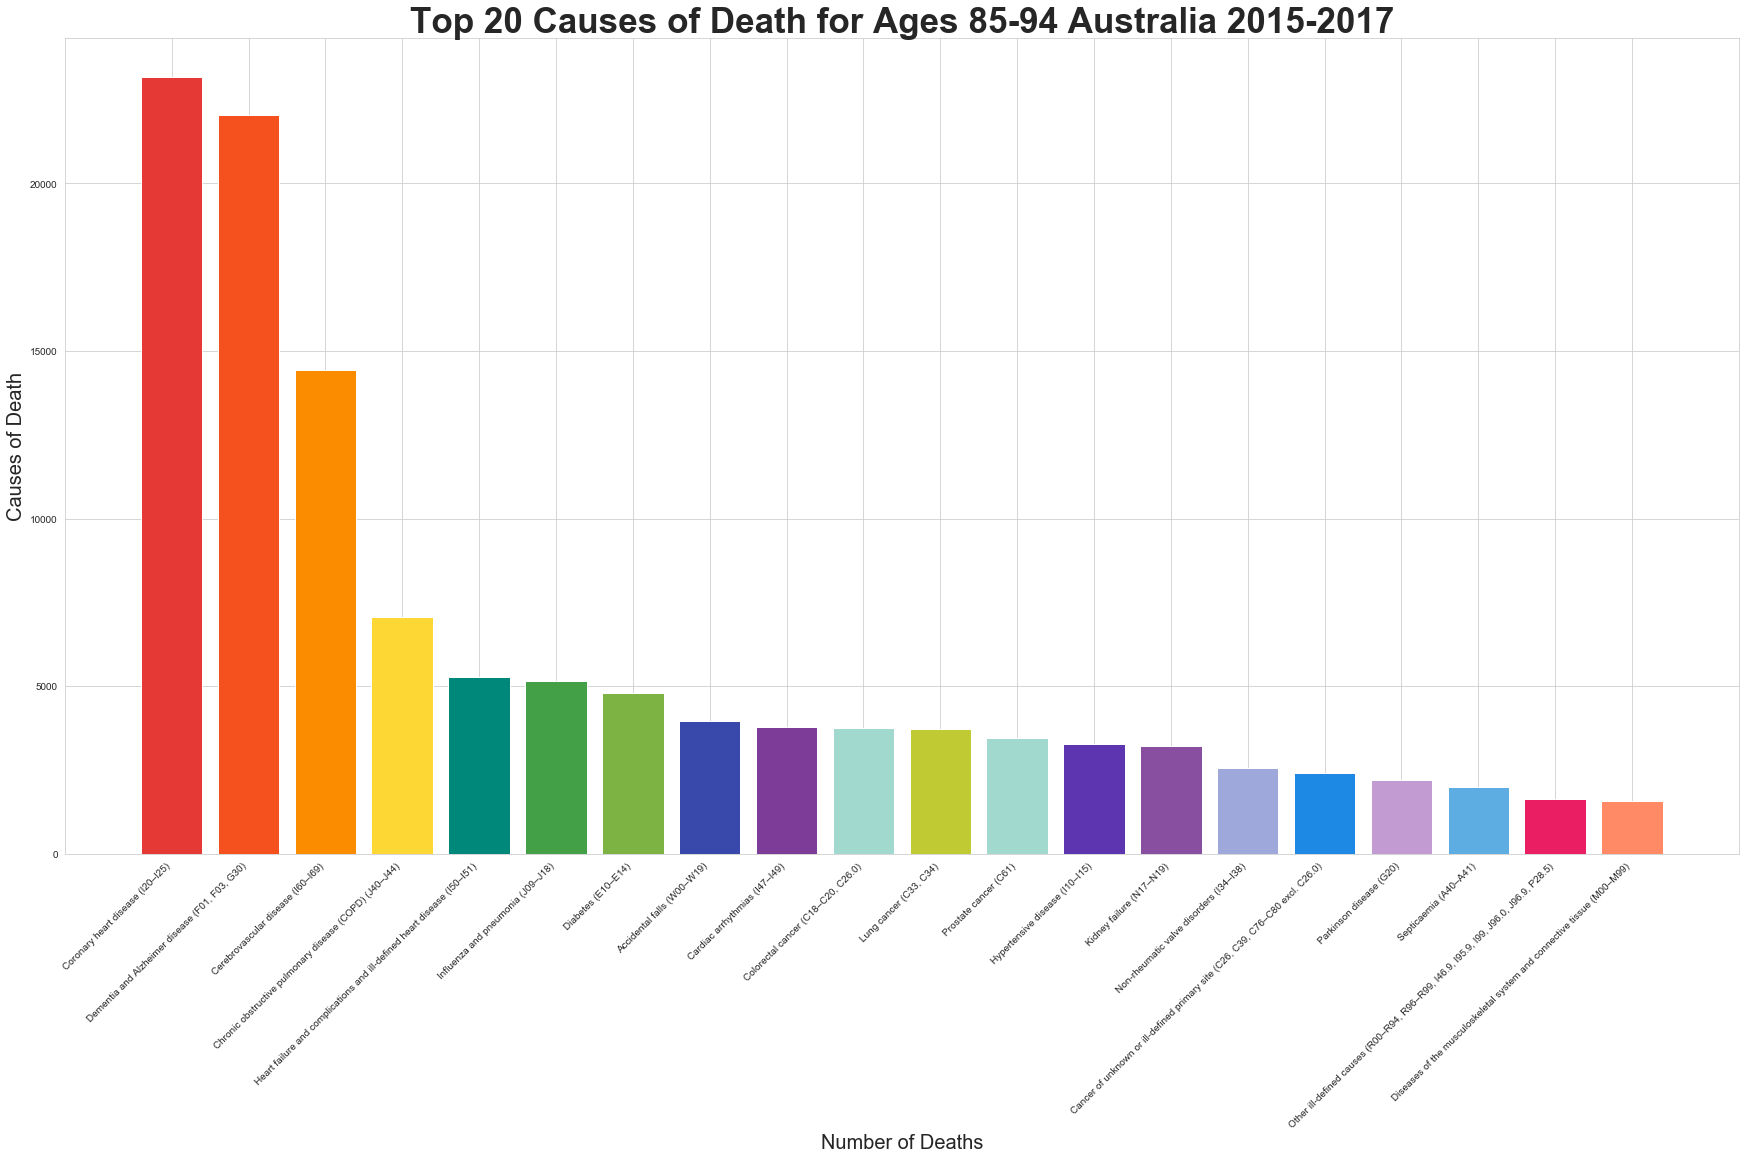

In [53]:
bar_chart(df=Group7, title="Top 20 Causes of Death for Ages 85-94 Australia 2015-2017", x=Group7_colour)

In [54]:
donut_chart(df=Group8, title="Top 20 Causes of Death for Ages 95+ Australia 2015-2017", x=Group8_colour)

In [55]:
bar_chart(df=Group8, title="Top 20 Causes of Death for Ages 95+ Australia 2015-2017", x=Group8_colour)

As we look at the charts it can be seen that the Top 3 leading causes for the following age groups are: 
- 1 to 14
    1. Land Transport Accidents
    2. Certain Conditions originating in the perintal period and deformations
    3. Brain Cancer 
- 15 to 24:
    1. Suicide
    2. Land Transport Accidents
    3. Accidental Poisoning

- 25 to 44:
    1. Suicide
    2. Accidental Poisoning
    3. Land Transport Accidents
    
In all three age groups land transport accidents takes a high percentage of death despite it not being in the Top 20 Main Causes of death in 2015-2017, however suicide takes first place in age groups 15 to 24 and 25 to 44. 

In [56]:
suicide_df = causes[causes["Cause"].str.contains("Suicide")].drop("Per cent", axis=1)
suicide_df

Age              Cause  Number of Deaths
28       1–14  Suicide (X60–X84)                53
41      15–24  Suicide (X60–X84)              1199
62      25–44  Suicide (X60–X84)              3452
85      45–64  Suicide (X60–X84)              2959
191  All ages  Suicide (X60–X84)              9051

In [57]:
def highlighted_lollipopchart(df=suicide_df, title="Number of Deaths by Intentional Self Harm 2015-2017"):
    plt.figure(figsize=(20, 10))
    ordered_df = df.sort_values(by='Number of Deaths')
    my_range=range(1,len(df.index)+1)
    # Bolding required Age Group
    my_color=np.where((ordered_df['Age']=='25–44')|(ordered_df['Age']=='15–24'), 'purple', 'skyblue')
    my_size=np.where((ordered_df['Age']=='25–44')|(ordered_df['Age']=='15–24'), 70, 30)
    # The vertical plot is made using the hline function
    plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Number of Deaths'], color=my_color, alpha=0.4)
    plt.scatter(ordered_df['Number of Deaths'], my_range, color=my_color, s=my_size, alpha=1)
    # Legend
    plt.yticks(my_range, ordered_df['Age'])
    plt.title(title, loc='center', fontsize=28, fontweight="bold")
    plt.xlabel('Number of Deaths',fontsize=15)
    plt.ylabel('Age Group', fontsize=15)


In [58]:
highlighted_lollipopchart(df=suicide_df, title="Number of Deaths by Intentional Self Harm 2015-2017")

In [59]:
row = {'Age':'All ages', 'Cause':'Land transport accidents (V01-V89)', 'Number of Deaths':4074}
landtransport_df = causes[causes["Cause"].str.contains("Land transport")].append(row, ignore_index=True).drop("Per cent", axis=1)
landtransport_df

Age                               Cause  Number of Deaths
0   Under 1  Land transport accidents (V01–V89)                 9
1      1–14  Land transport accidents (V01–V89)               153
2     15–24  Land transport accidents (V01–V89)               738
3     25–44  Land transport accidents (V01–V89)              1199
4     45–64  Land transport accidents (V01–V89)               949
5  All ages  Land transport accidents (V01-V89)              4074

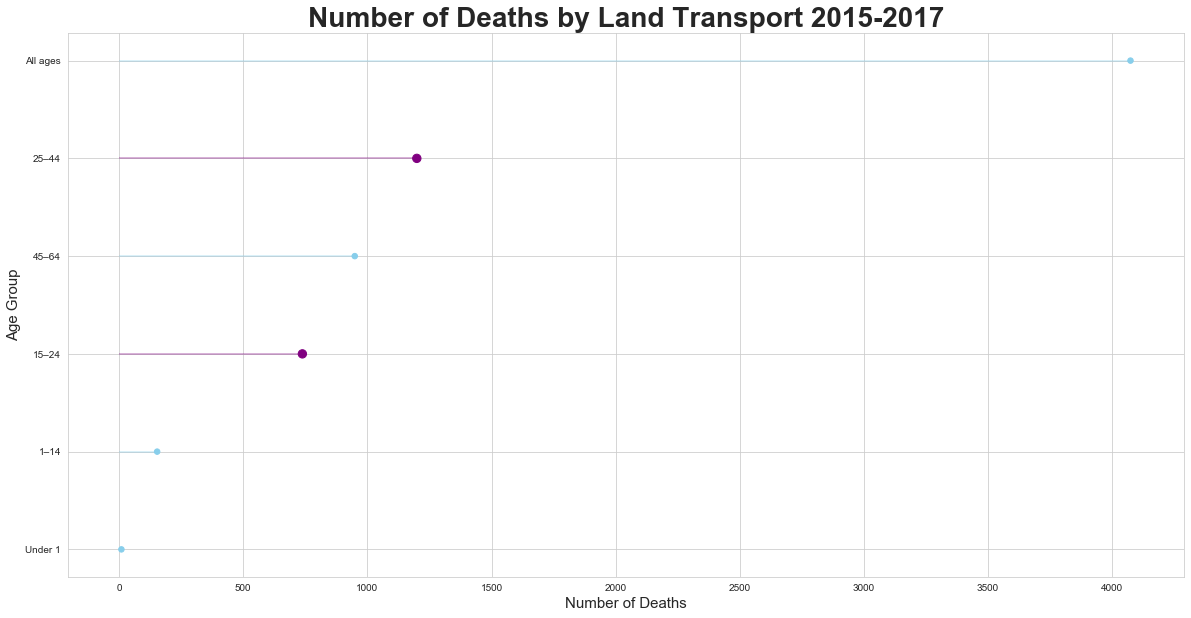

In [60]:
highlighted_lollipopchart(df=landtransport_df, title="Number of Deaths by Land Transport 2015-2017")

# So what do mortality rates look like in Australia?

 - As years go by the number of deaths increases while the potential years of life lost decreases. 
 
 - One of the reasons inlcude that the number of child deaths from ages 0-4 has decreased since 1907 to 2017. 
 
 - Life expectancy from birth increased rapidly during 1880 - 1960 but in the past 10 years it has been steady

 - From 2015-2017 the leading age group of deaths were ages 85-95 with Coronoary heart disease being the leading cause. 
 
 - Although majority of causes in the Top 20 do not apply to younger age groups deaths, younger age groups contribute to a large percentage of land transport and intentional self harm related deaths. 

In [61]:
pip install RISE

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install --upgrade pip

Requirement already up-to-date: pip in /Applications/anaconda3/lib/python3.7/site-packages (20.2.2)
Note: you may need to restart the kernel to use updated packages.
